In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import dump

C:\Users\zeel sheth\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\zeel sheth\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\zeel sheth\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\zeel sheth\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("cloudburst.csv")
pd.set_option("display.max_columns", None)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Almora     13.4     22.9       0.6          NaN       NaN   
1  02-12-2008   Almora      7.4     25.1       0.0          NaN       NaN   
2  03-12-2008   Almora     12.9     25.7       0.0          NaN       NaN   
3  04-12-2008   Almora      9.2     28.0       0.0          NaN       NaN   
4  05-12-2008   Almora     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm CloudBurst Today CloudBurstTomorrow  
0       NaN     16.9     21.8               No                 No  
1       NaN     17.2     24.3               No                 No  
2       2.0     21.0     23.2               No                 No  
3       NaN     18.1     26.5               No                 No  
4       8.0     17.8     29.7               No                 No

In [3]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [4]:
df.isnull().sum()*100/len(df)

Date                   0.000000
Location               0.000000
MinTemp                1.020899
MaxTemp                0.866905
Rainfall               2.241853
Evaporation           43.166506
Sunshine              48.009762
WindGustDir            7.098859
WindGustSpeed          7.055548
WindDir9am             7.263853
WindDir3pm             2.906641
WindSpeed9am           1.214767
WindSpeed3pm           2.105046
Humidity9am            1.824557
Humidity3pm            3.098446
Pressure9am           10.356799
Pressure3pm           10.331363
Cloud9am              38.421559
Cloud3pm              40.807095
Temp9am                1.214767
Temp3pm                2.481094
CloudBurst Today       2.241853
CloudBurstTomorrow     2.245978
dtype: float64

In [5]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [6]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [7]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [8]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Almora     13.4     22.9       0.6          2.4       8.3   
1  02-12-2008   Almora      7.4     25.1       0.0          3.6      10.0   
2  03-12-2008   Almora     12.9     25.7       0.0          2.6       4.4   
3  04-12-2008   Almora      9.2     28.0       0.0         18.4       8.9   
4  05-12-2008   Almora     17.5     32.3       1.0          5.4       3.0   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       7.0   
2          26.0         38.0         30.0       1007.6       1008.7       8.0   
3           9.0         45.0         16.0       1017.6       1012.8       0.0   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm CloudBurst Today CloudBurstTomorrow  
0       0.0     16.9     21.8               No                 No  
1       1.0     17.2     24.3               No                 No  
2       2.0     21.0     23.2               No                 No  
3       5.0     18.1     26.5               No                 No  
4       8.0     17.8     29.7               No                 No

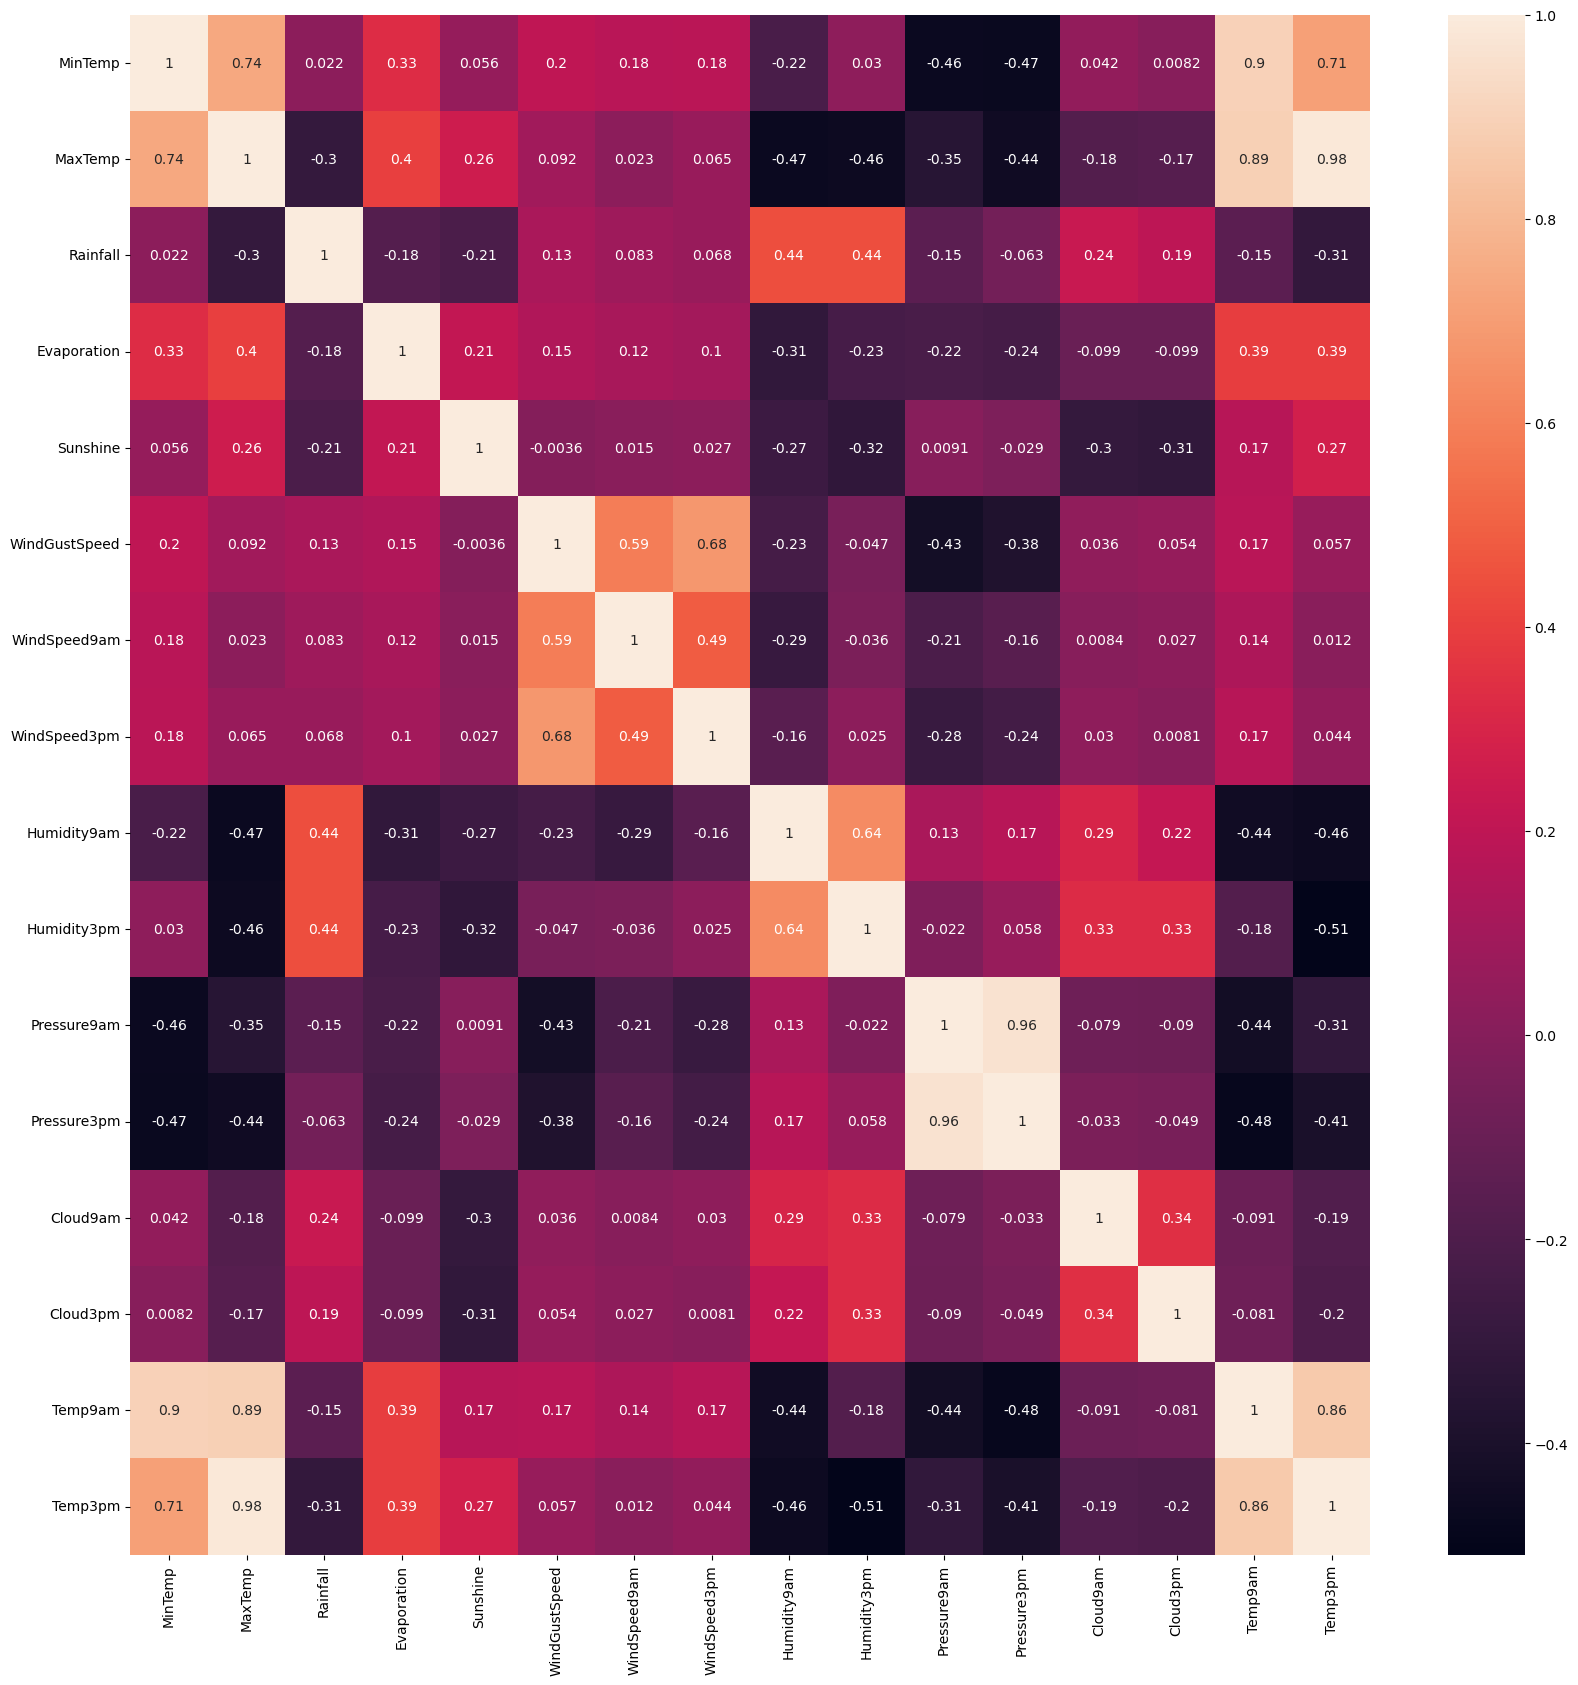

In [9]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


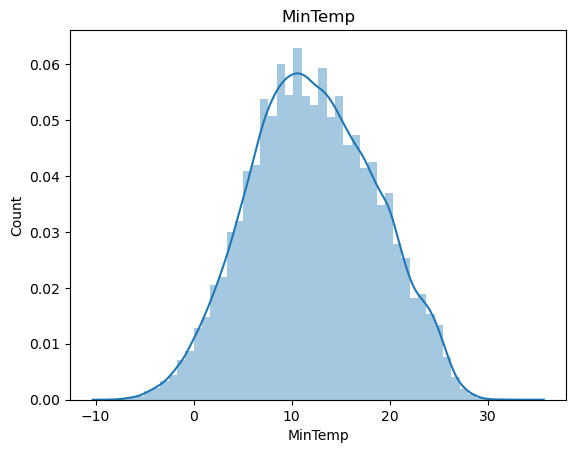

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


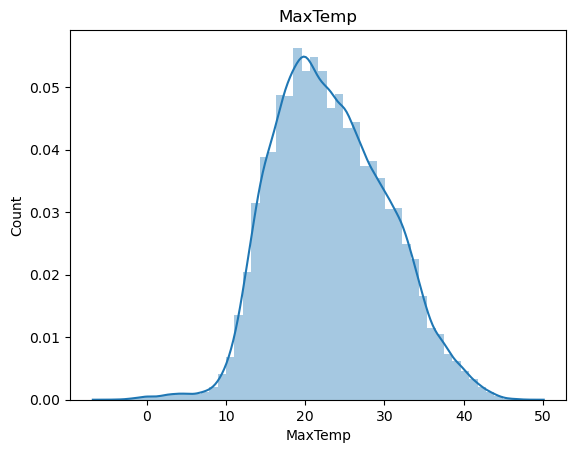

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


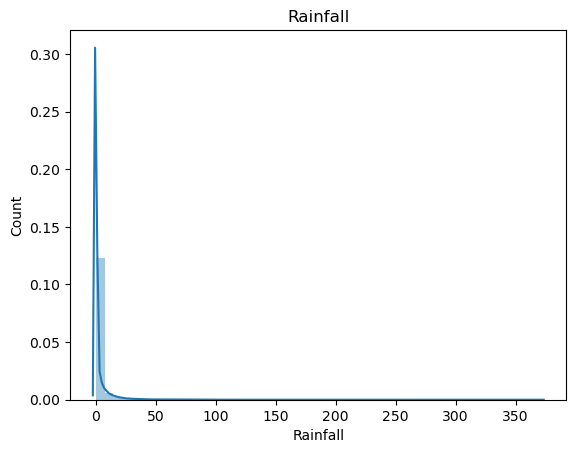

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


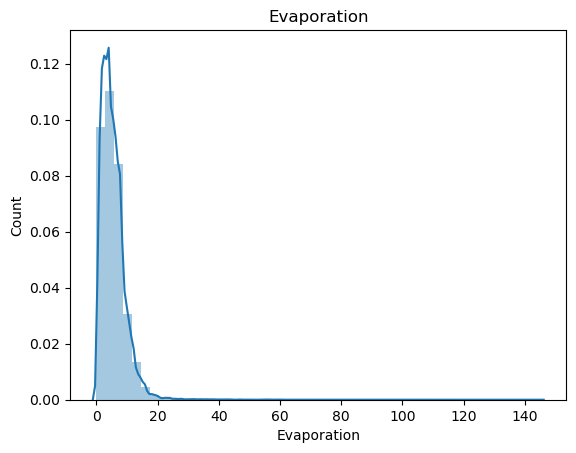

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


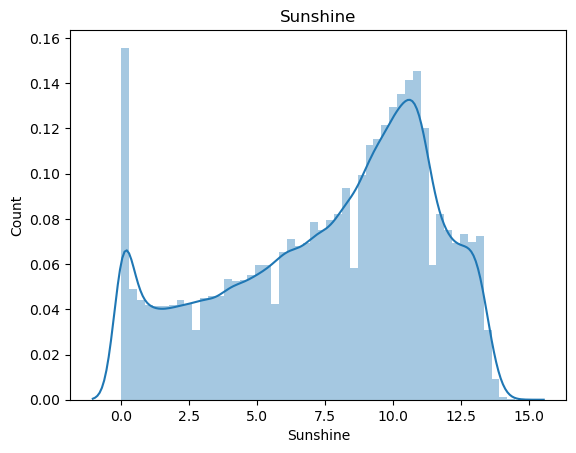

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


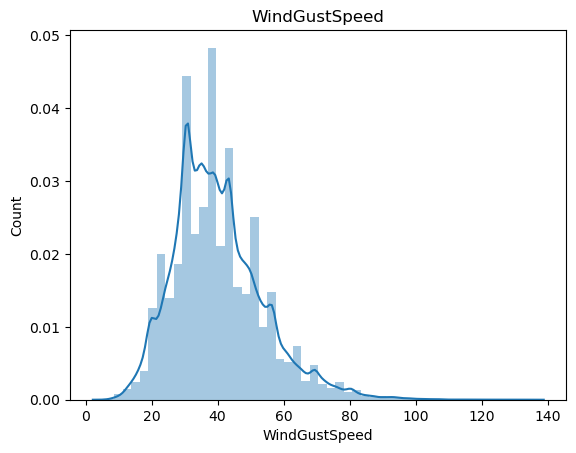

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


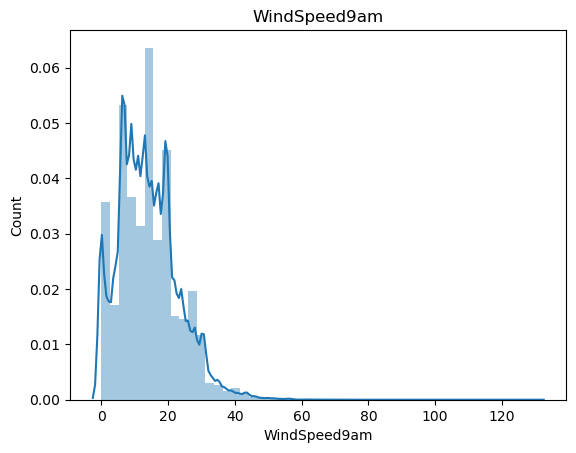

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


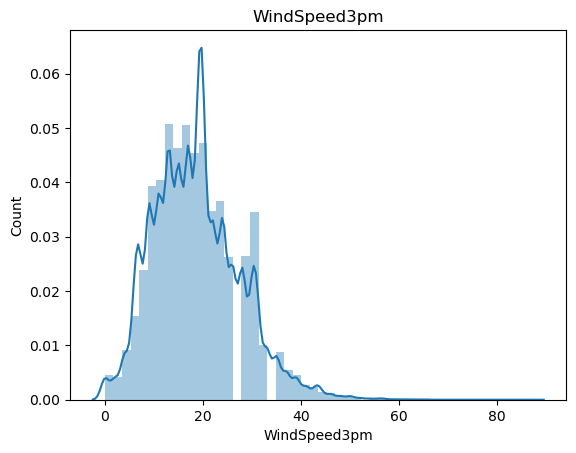

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


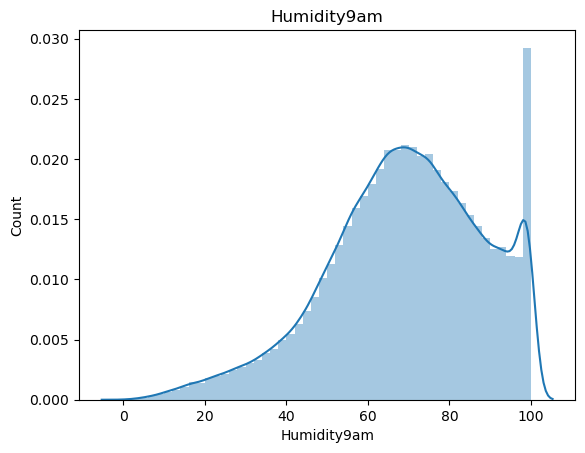

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


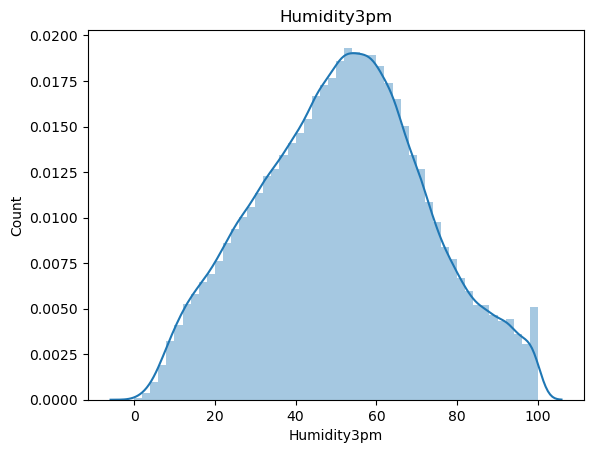

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


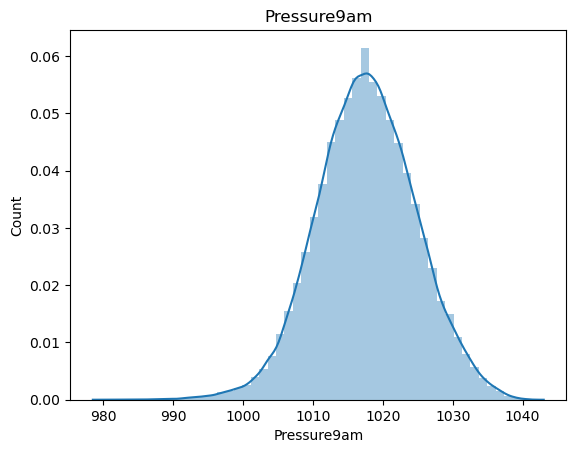

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


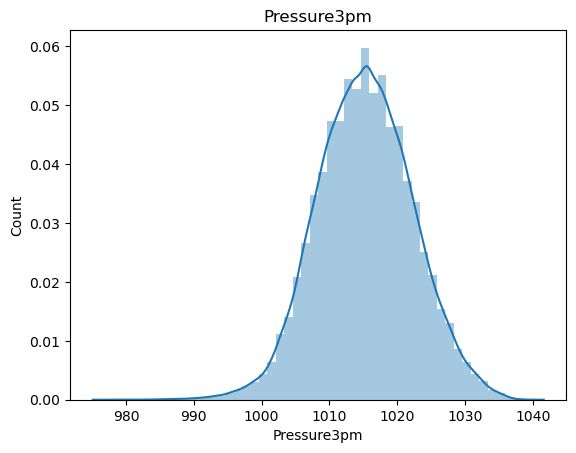

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


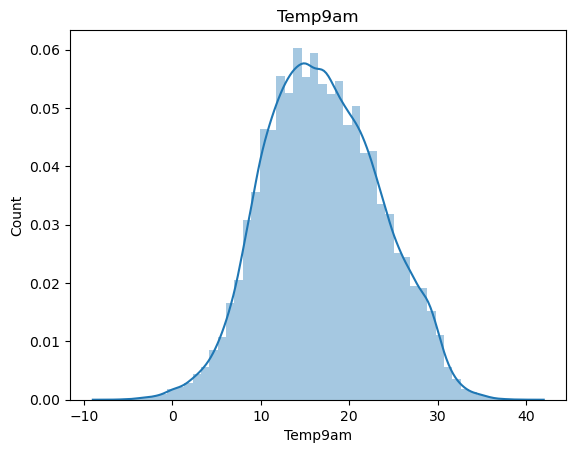

<Figure size 1500x1500 with 0 Axes>

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


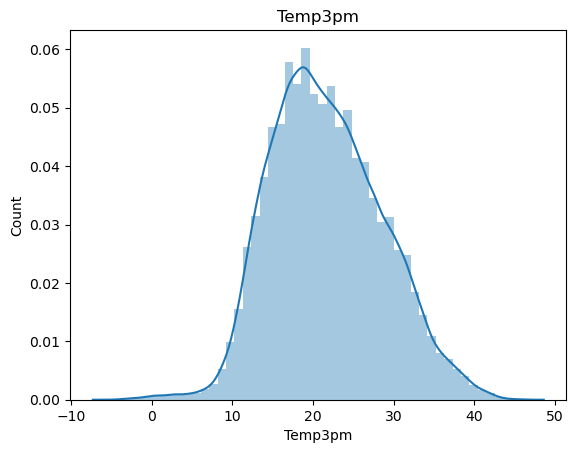

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [11]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [12]:
df.isnull().sum()*100/len(df)

Date                  0.000000
Location              0.000000
MinTemp               0.000000
MaxTemp               0.000000
Rainfall              0.000000
Evaporation           0.000000
Sunshine              0.000000
WindGustDir           7.098859
WindGustSpeed         0.000000
WindDir9am            7.263853
WindDir3pm            2.906641
WindSpeed9am          0.000000
WindSpeed3pm          0.000000
Humidity9am           0.000000
Humidity3pm           0.000000
Pressure9am           0.000000
Pressure3pm           0.000000
Cloud9am              0.000000
Cloud3pm              0.000000
Temp9am               0.000000
Temp3pm               0.000000
CloudBurst Today      2.241853
CloudBurstTomorrow    2.245978
dtype: float64

In [13]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [14]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [15]:
df["CloudBurst Today"] = pd.get_dummies(df["CloudBurst Today"], drop_first = True)
df["CloudBurstTomorrow"] = pd.get_dummies(df["CloudBurstTomorrow"], drop_first = True)
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01-12-2008   Almora     13.4     22.9       0.6          2.4   
1       02-12-2008   Almora      7.4     25.1       0.0          3.6   
2       03-12-2008   Almora     12.9     25.7       0.0          2.6   
3       04-12-2008   Almora      9.2     28.0       0.0         18.4   
4       05-12-2008   Almora     17.5     32.3       1.0          5.4   
...            ...      ...      ...      ...       ...          ...   
145455  21-06-2017   Laksar      2.8     23.4       0.0          1.4   
145456  22-06-2017   Laksar      3.6     25.3       0.0          7.6   
145457  23-06-2017   Laksar      5.4     26.9       0.0          6.8   
145458  24-06-2017   Laksar      7.8     27.0       0.0          2.6   
145459  25-06-2017   Laksar     14.9     22.6       0.0          1.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            8.3           W           44.0          W        WNW   
1           10.0         WNW           44.0        NNW        WSW   
2            4.4         WSW           46.0          W        WSW   
3            8.9          NE           24.0         SE          E   
4            3.0           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       7.8           E           31.0         SE        ENE   
145456      13.5         NNW           22.0         SE          N   
145457      11.0           N           37.0         SE        WNW   
145458      13.2          SE           28.0        SSE          N   
145459       0.7         NaN           39.0        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  CloudBurst Today  \
0            1007.1       8.0       0.0     16.9     21.8                 0   
1            1007.8       7.0       1.0     17.2     24.3                 0   
2            1008.7       8.0       2.0     21.0     23.2                 0   
3            1012.8       0.0       5.0     18.1     26.5                 0   
4            1006.0       7.0       8.0     17.8     29.7                 0   
...             ...       ...       ...      ...      ...               ...   
145455       1020.3       1.0       1.0     10.1     22.4                 0   
145456       1019.1       8.0       5.0     10.9     24.5                 0   
145457       1016.8       8.0       1.0     12.5     26.1                 0   
145458       1016.5       3.0       2.0     15.1     26.0                 0   
145459       1017.9       8.0       8.0     15.0     20.9                 0   

        CloudBurstTomorrow  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
145455                   0  
145456                   0  
145457                   0  
145458                   0  
145459                   0  

[145460 rows x 23 columns]

In [16]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["CloudBurstTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['19-12-2007', '30-01-2008', '24-12-2007', '13-04-2008', '19-06-2008',
       '02-11-2007', '03-11-2007', '20-12-2007', '03-12-2007', '21-12-2007',
       ...
       '29-04-2008', '25-04-2008', '14-01-2008', '14-02-2008', '19-08-2008',
       '29-03-2008', '29-02-2008', '08-03-2008', '19-07-2008', '01-01-2008'],
      dtype='object', name='Date', length=3436)
Location Index(['Bhowali', 'GaucharAirport', 'Narendra_Nagar', 'Barkot',
       'Tehri Garhwal', 'RamNagar', 'VikasNagar', 'Khatima', 'Uttarkashi',
       'Badrinath', 'Bageshwar', 'Dwarhat', 'Pauri_Garhwal',
       'Pauri_GarhwalAirport', 'Kedarnath', 'Rishikesh', 'Gangotri', 'Uddham',
       'NainiSainiAirport', 'Kashipur', 'Champavat', 'Bhopeshwar', 'Chamba',
       'KotdwarAirport', 'RaniKhet', 'Sitarganj', 'Almora', 'Pantnagar',
       'Kotdwar', 'Rudrapur', 'Chamoli', 'Nainital', 'JolyAirport', 'Roorkee',
       'Haridwar', 'DevPrayag', 'Mussoorie', 'Pithoragarh', 'Haldwani',
       'Lohaghat', 'BheemTal', 'MaaGan

In [17]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [18]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [19]:
df.isnull().sum()*100/len(df)

Date                  0.0
Location              0.0
MinTemp               0.0
MaxTemp               0.0
Rainfall              0.0
Evaporation           0.0
Sunshine              0.0
WindGustDir           0.0
WindGustSpeed         0.0
WindDir9am            0.0
WindDir3pm            0.0
WindSpeed9am          0.0
WindSpeed3pm          0.0
Humidity9am           0.0
Humidity3pm           0.0
Pressure9am           0.0
Pressure3pm           0.0
Cloud9am              0.0
Cloud3pm              0.0
Temp9am               0.0
Temp3pm               0.0
CloudBurst Today      0.0
CloudBurstTomorrow    0.0
dtype: float64

In [20]:
df1 = df.groupby(["Location"])["CloudBurstTomorrow"].value_counts().unstack()

In [21]:
df1.head()

CloudBurstTomorrow     0    1
Location                     
Almora              2422  618
Badrinath           2221  819
Bageshwar           2196  808
Barkot              2087  922
BheemTal            2504  505

In [22]:
df1[1].sort_values(ascending = False)

Location
Bhowali                 1095
Narendra_Nagar           950
GaucharAirport           949
Barkot                   922
RamNagar                 920
Tehri Garhwal            919
VikasNagar               902
Khatima                  879
Uttarkashi               869
Pauri_Garhwal            865
Dwarhat                  852
Badrinath                819
Bageshwar                808
Kedarnath                781
Rishikesh                775
Pauri_GarhwalAirport     774
NainiSainiAirport        761
Gangotri                 738
Uddham                   731
Kashipur                 713
Chamba                   709
Champavat                700
Bhopeshwar               699
RaniKhet                 688
KotdwarAirport           653
Pantnagar                645
Sitarganj                643
Kotdwar                  636
Mussoorie                629
Almora                   618
Chamoli                  595
Rudrapur                 592
Nainital                 583
Roorkee                  568
JolyA

In [23]:
df1[1].sort_values(ascending = False).index

Index(['Bhowali', 'Narendra_Nagar', 'GaucharAirport', 'Barkot', 'RamNagar',
       'Tehri Garhwal', 'VikasNagar', 'Khatima', 'Uttarkashi', 'Pauri_Garhwal',
       'Dwarhat', 'Badrinath', 'Bageshwar', 'Kedarnath', 'Rishikesh',
       'Pauri_GarhwalAirport', 'NainiSainiAirport', 'Gangotri', 'Uddham',
       'Kashipur', 'Chamba', 'Champavat', 'Bhopeshwar', 'RaniKhet',
       'KotdwarAirport', 'Pantnagar', 'Sitarganj', 'Kotdwar', 'Mussoorie',
       'Almora', 'Chamoli', 'Rudrapur', 'Nainital', 'Roorkee', 'JolyAirport',
       'DevPrayag', 'Haridwar', 'Pithoragarh', 'Haldwani', 'BheemTal',
       'MaaGangaAirport', 'Rudraprayag', 'Dehradun', 'Manglur', 'Lohaghat',
       'Srinagar', 'KarnaPrayag', 'LansDowne', 'Laksar'],
      dtype='object', name='Location')

In [24]:
len(df1[1].sort_values(ascending = False).index)

49

In [25]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [26]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [27]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [28]:
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       NaT       NaN     13.4     22.9       0.6          2.4       8.3   
1       NaT       NaN      7.4     25.1       0.0          3.6      10.0   
2       NaT       NaN     12.9     25.7       0.0          2.6       4.4   
3       NaT       NaN      9.2     28.0       0.0         18.4       8.9   
4       NaT       NaN     17.5     32.3       1.0          5.4       3.0   
...     ...       ...      ...      ...       ...          ...       ...   
145455  NaT       NaN      2.8     23.4       0.0          1.4       7.8   
145456  NaT       NaN      3.6     25.3       0.0          7.6      13.5   
145457  NaT       NaN      5.4     26.9       0.0          6.8      11.0   
145458  NaT       NaN      7.8     27.0       0.0          2.6      13.2   
145459  NaT       NaN     14.9     22.6       0.0          1.4       0.7   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0               4.0           44.0         5.0         3.0          20.0   
1               2.0           44.0         0.0         6.0           4.0   
2               5.0           46.0         5.0         6.0          19.0   
3              11.0           24.0        13.0        14.0          11.0   
4               4.0           41.0        12.0         0.0           7.0   
...             ...            ...         ...         ...           ...   
145455         15.0           31.0        13.0        13.0          13.0   
145456          0.0           22.0        13.0         2.0          13.0   
145457          3.0           37.0        13.0         3.0           9.0   
145458         12.0           28.0        11.0         2.0          13.0   
145459          4.0           39.0        14.0        15.0          17.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
145455          11.0         51.0         24.0       1024.6       1020.3   
145456           9.0         56.0         21.0       1023.5       1019.1   
145457           9.0         53.0         24.0       1021.0       1016.8   
145458           7.0         51.0         24.0       1019.4       1016.5   
145459          17.0         62.0         36.0       1020.2       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  CloudBurst Today  \
0            8.0       0.0     16.9     21.8                 0   
1            7.0       1.0     17.2     24.3                 0   
2            8.0       2.0     21.0     23.2                 0   
3            0.0       5.0     18.1     26.5                 0   
4            7.0       8.0     17.8     29.7                 0   
...          ...       ...      ...      ...               ...   
145455       1.0       1.0     10.1     22.4                 0   
145456       8.0       5.0     10.9     24.5                 0   
145457       8.0       1.0     12.5     26.1                 0   
145458       3.0       2.0     15.1     26.0                 0   
145459       8.0       8.0     15.0     20.9                 0   

        CloudBurstTomorrow  Date_month  Date_day  
0                        0         NaN       NaN  
1                        0         NaN       NaN  
2                        0         NaN       NaN  
3                        0         NaN       NaN  
4                        0         NaN       NaN  
...                    ...         ...       ...  
145455                   0         NaN       NaN  
145456                   0         NaN       NaN  
145457          

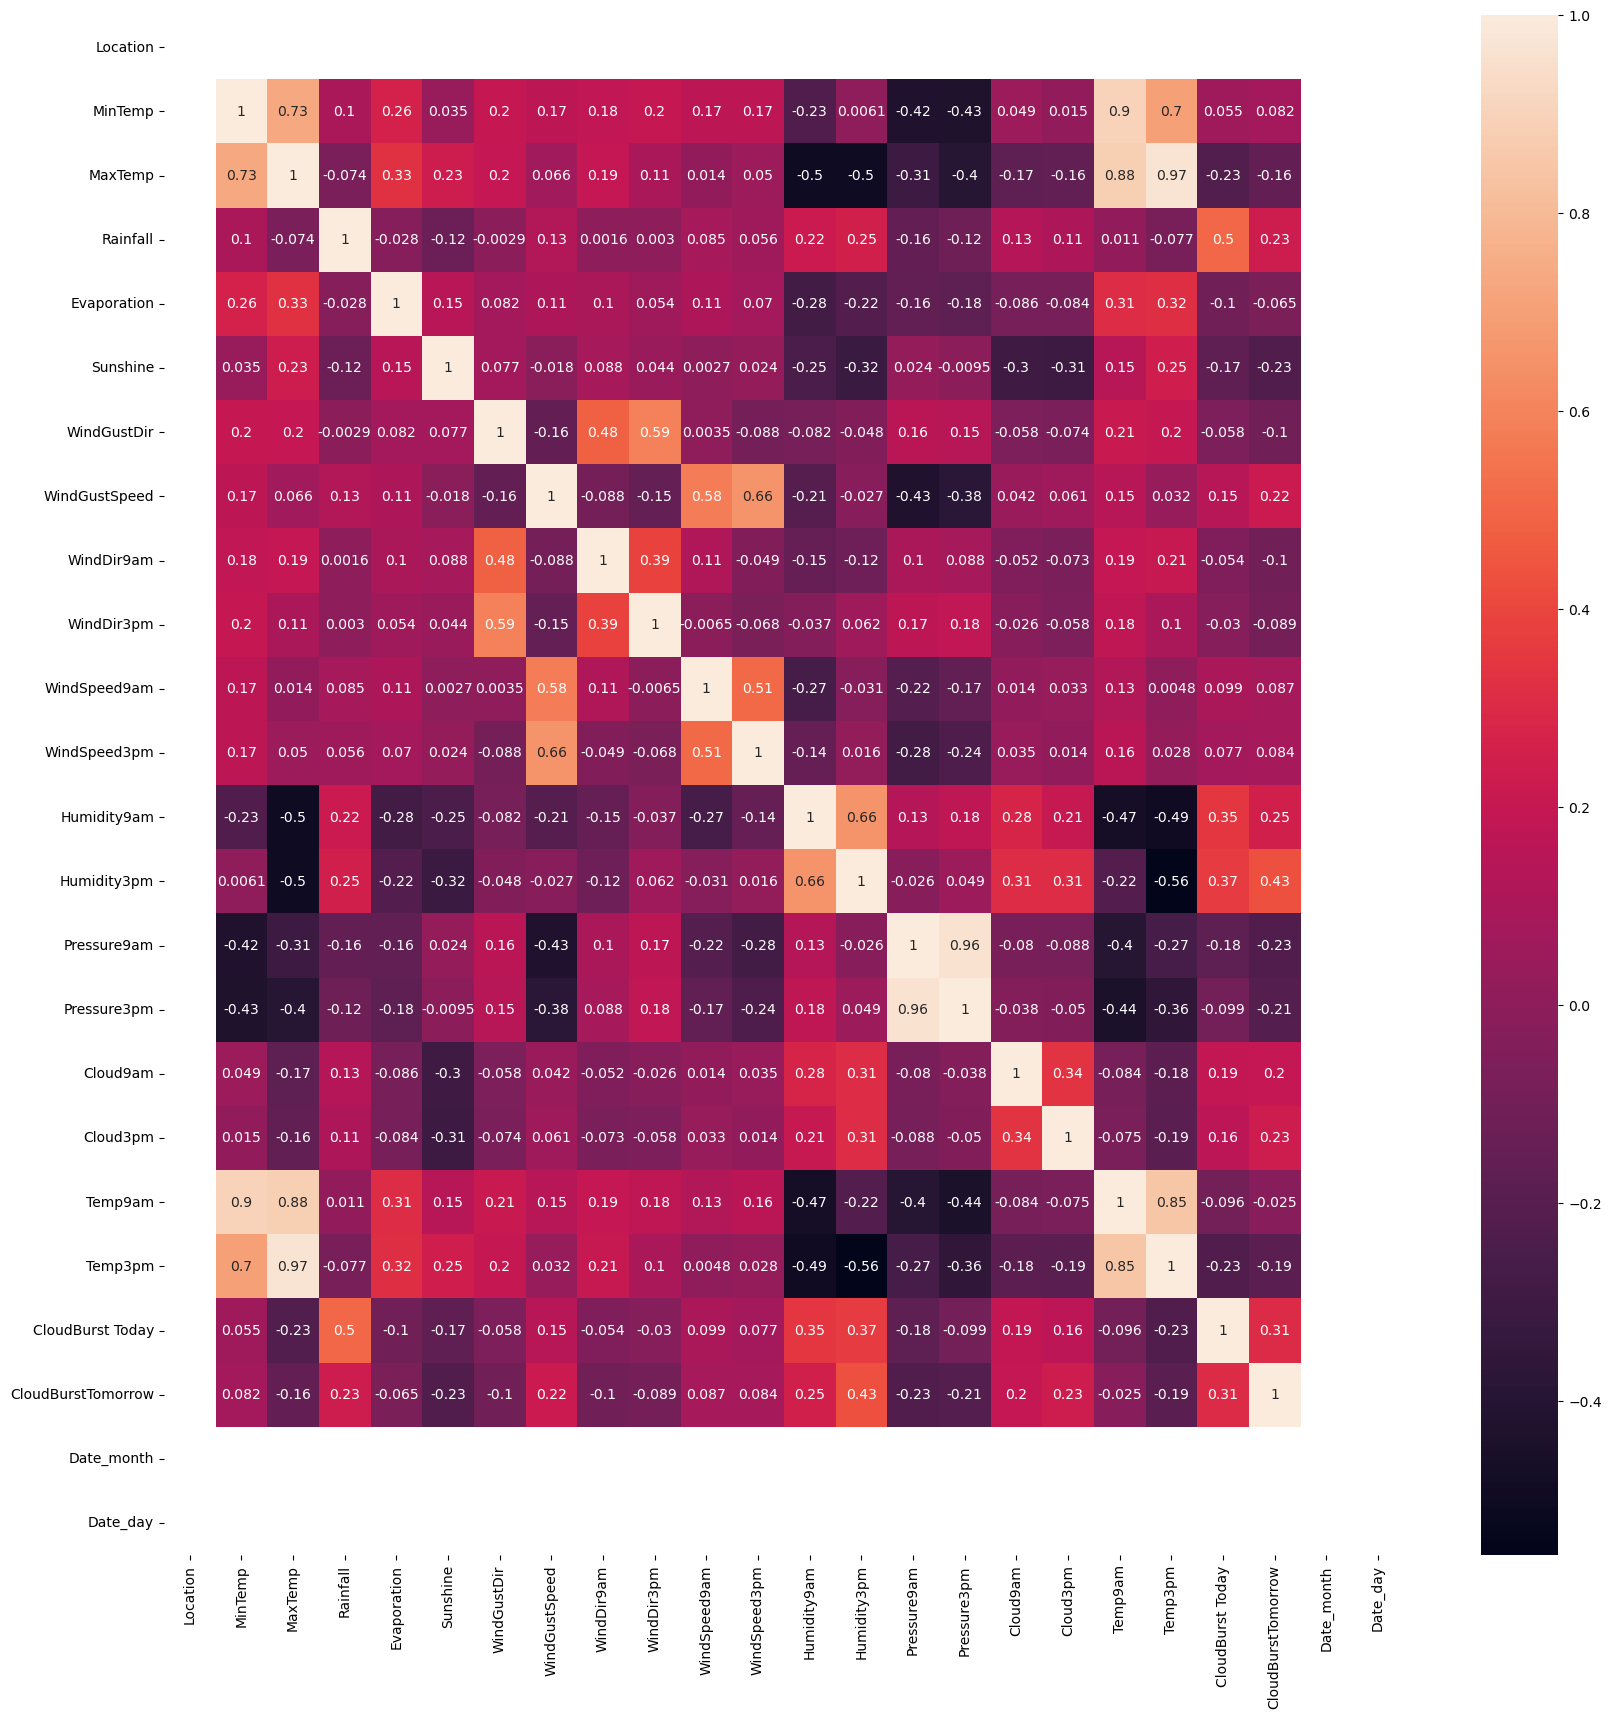

In [29]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

C:\Users\zeel sheth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CloudBurstTomorrow', ylabel='count'>

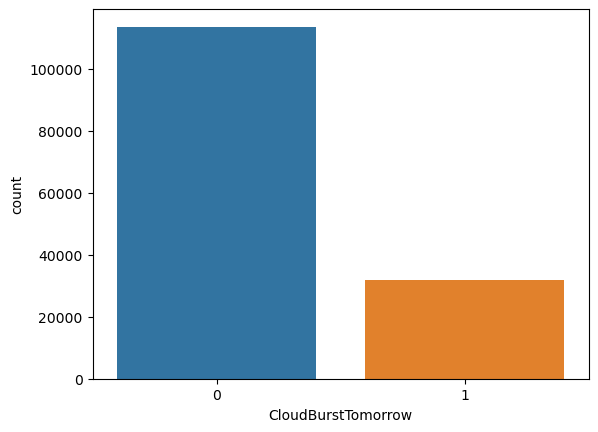

In [30]:
sns.countplot(df["CloudBurstTomorrow"])

In [31]:
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       NaT       NaN     13.4     22.9       0.6          2.4       8.3   
1       NaT       NaN      7.4     25.1       0.0          3.6      10.0   
2       NaT       NaN     12.9     25.7       0.0          2.6       4.4   
3       NaT       NaN      9.2     28.0       0.0         18.4       8.9   
4       NaT       NaN     17.5     32.3       1.0          5.4       3.0   
...     ...       ...      ...      ...       ...          ...       ...   
145455  NaT       NaN      2.8     23.4       0.0          1.4       7.8   
145456  NaT       NaN      3.6     25.3       0.0          7.6      13.5   
145457  NaT       NaN      5.4     26.9       0.0          6.8      11.0   
145458  NaT       NaN      7.8     27.0       0.0          2.6      13.2   
145459  NaT       NaN     14.9     22.6       0.0          1.4       0.7   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0               4.0           44.0         5.0         3.0          20.0   
1               2.0           44.0         0.0         6.0           4.0   
2               5.0           46.0         5.0         6.0          19.0   
3              11.0           24.0        13.0        14.0          11.0   
4               4.0           41.0        12.0         0.0           7.0   
...             ...            ...         ...         ...           ...   
145455         15.0           31.0        13.0        13.0          13.0   
145456          0.0           22.0        13.0         2.0          13.0   
145457          3.0           37.0        13.0         3.0           9.0   
145458         12.0           28.0        11.0         2.0          13.0   
145459          4.0           39.0        14.0        15.0          17.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
145455          11.0         51.0         24.0       1024.6       1020.3   
145456           9.0         56.0         21.0       1023.5       1019.1   
145457           9.0         53.0         24.0       1021.0       1016.8   
145458           7.0         51.0         24.0       1019.4       1016.5   
145459          17.0         62.0         36.0       1020.2       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  CloudBurst Today  \
0            8.0       0.0     16.9     21.8                 0   
1            7.0       1.0     17.2     24.3                 0   
2            8.0       2.0     21.0     23.2                 0   
3            0.0       5.0     18.1     26.5                 0   
4            7.0       8.0     17.8     29.7                 0   
...          ...       ...      ...      ...               ...   
145455       1.0       1.0     10.1     22.4                 0   
145456       8.0       5.0     10.9     24.5                 0   
145457       8.0       1.0     12.5     26.1                 0   
145458       3.0       2.0     15.1     26.0                 0   
145459       8.0       8.0     15.0     20.9                 0   

        CloudBurstTomorrow  Date_month  Date_day  
0                        0         NaN       NaN  
1                        0         NaN       NaN  
2                        0         NaN       NaN  
3                        0         NaN       NaN  
4                        0         NaN       NaN  
...                    ...         ...       ...  
145455                   0         NaN       NaN  
145456                   0         NaN       NaN  
145457          

In [32]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [33]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [34]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [35]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [36]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [37]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [38]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [39]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [40]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [41]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [42]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [43]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [44]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [45]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [46]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [47]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [48]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [49]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [50]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [51]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [52]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [53]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [54]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [55]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [56]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

In [57]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


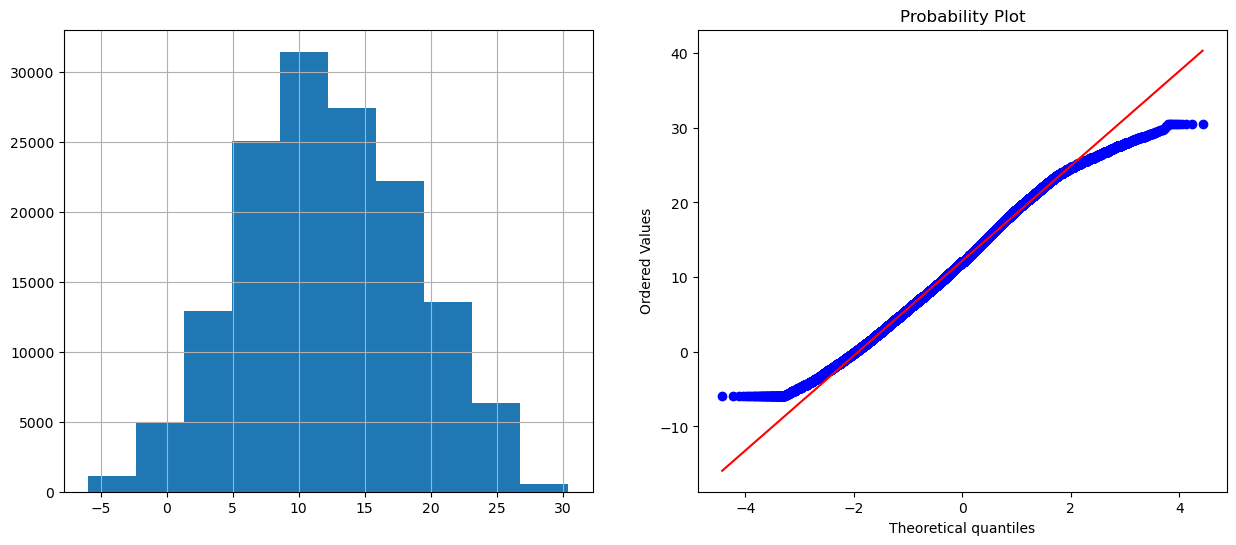

MaxTemp


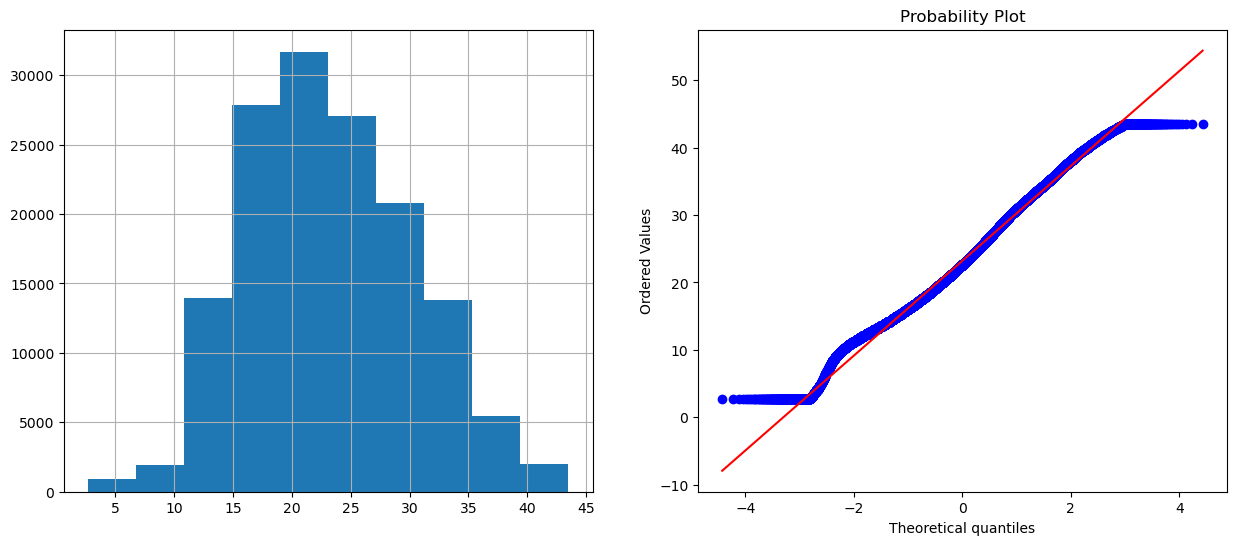

Rainfall


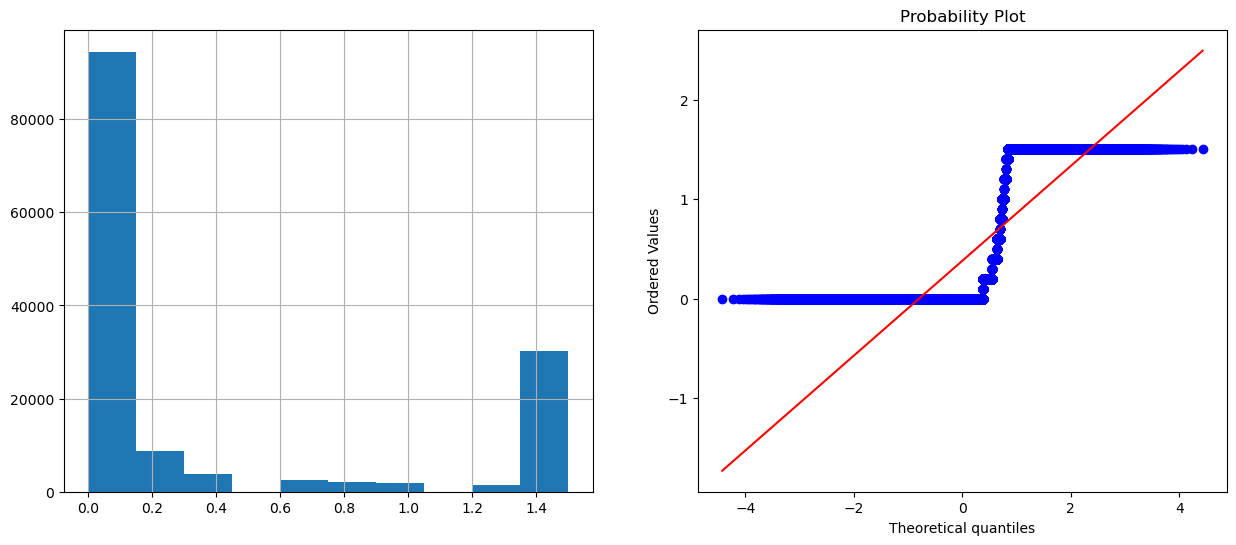

Evaporation


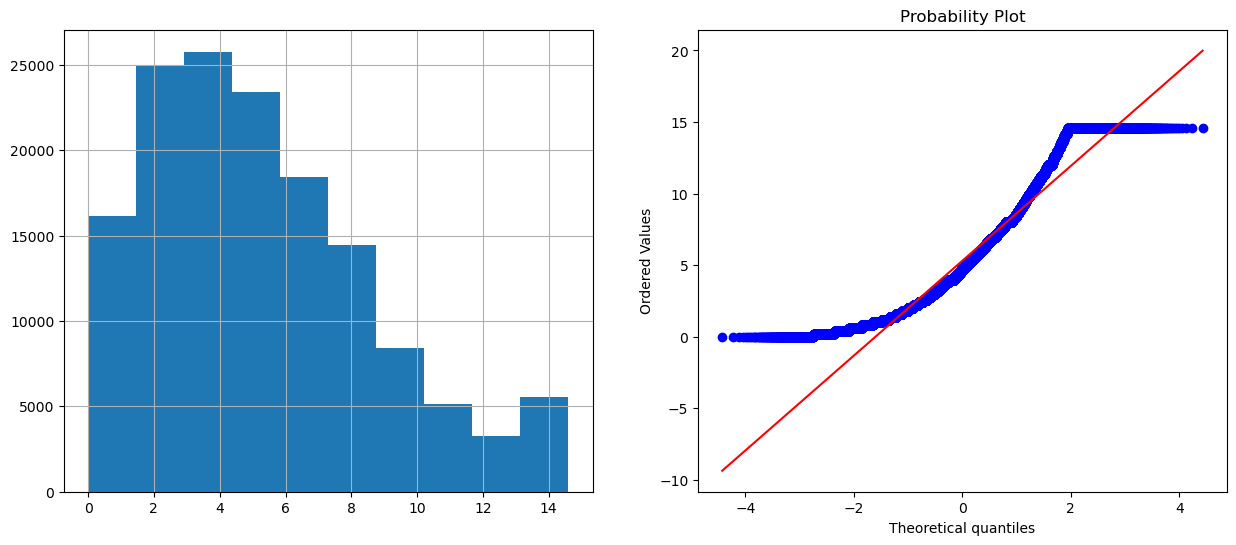

Sunshine


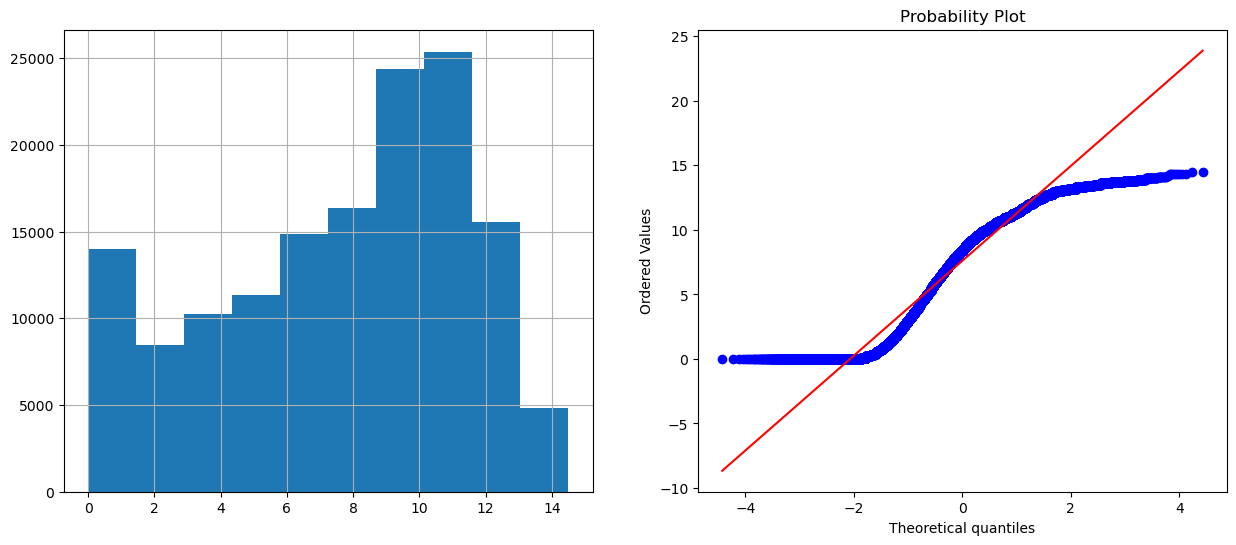

WindGustSpeed


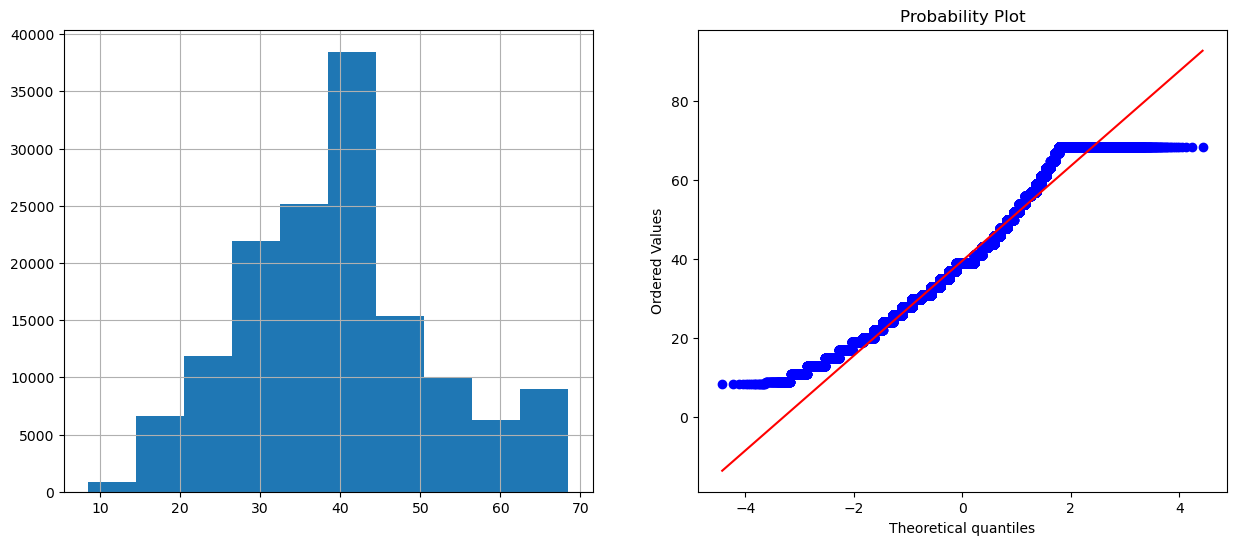

WindSpeed9am


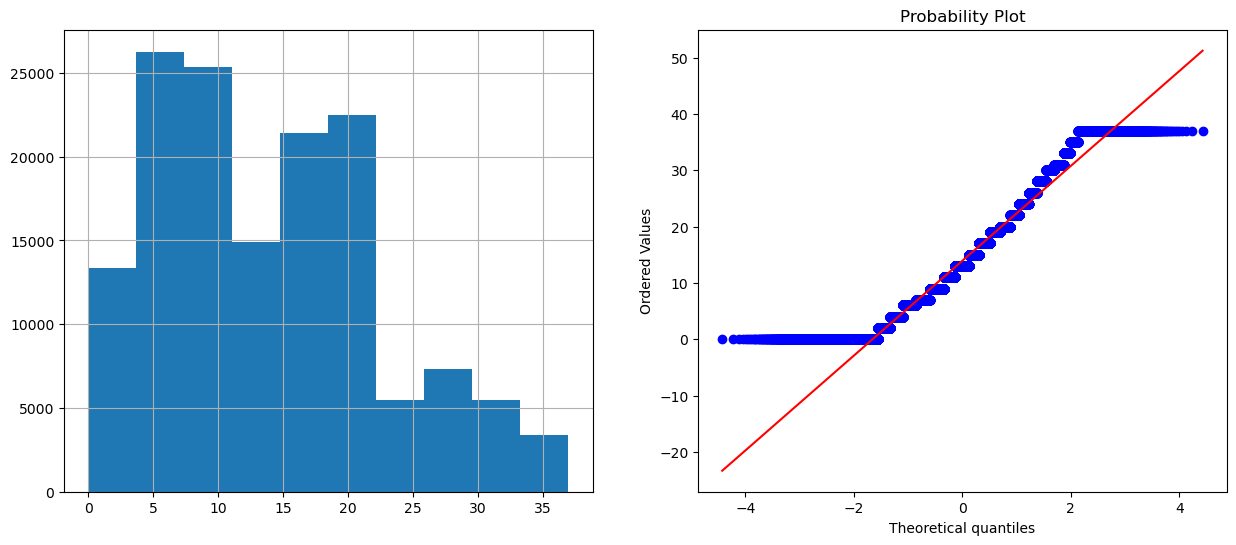

WindSpeed3pm


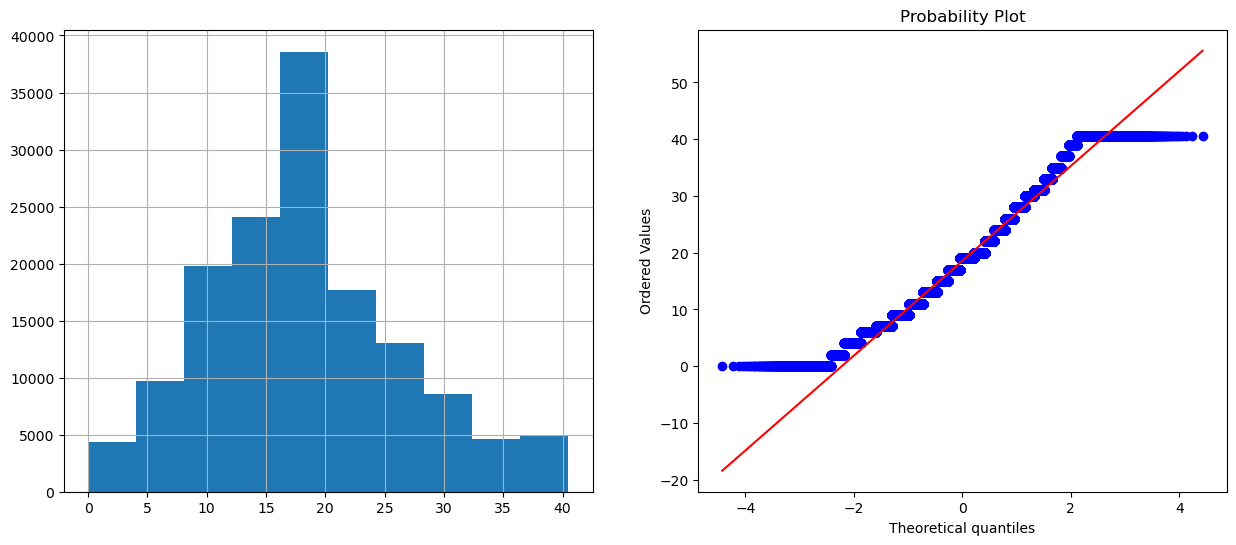

Humidity9am


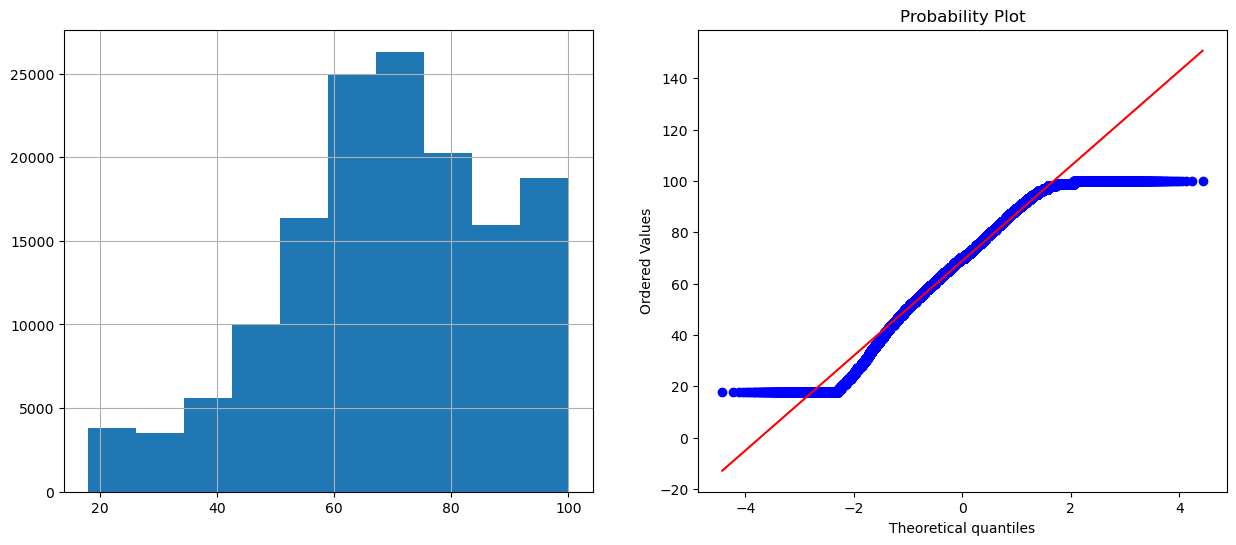

Humidity3pm


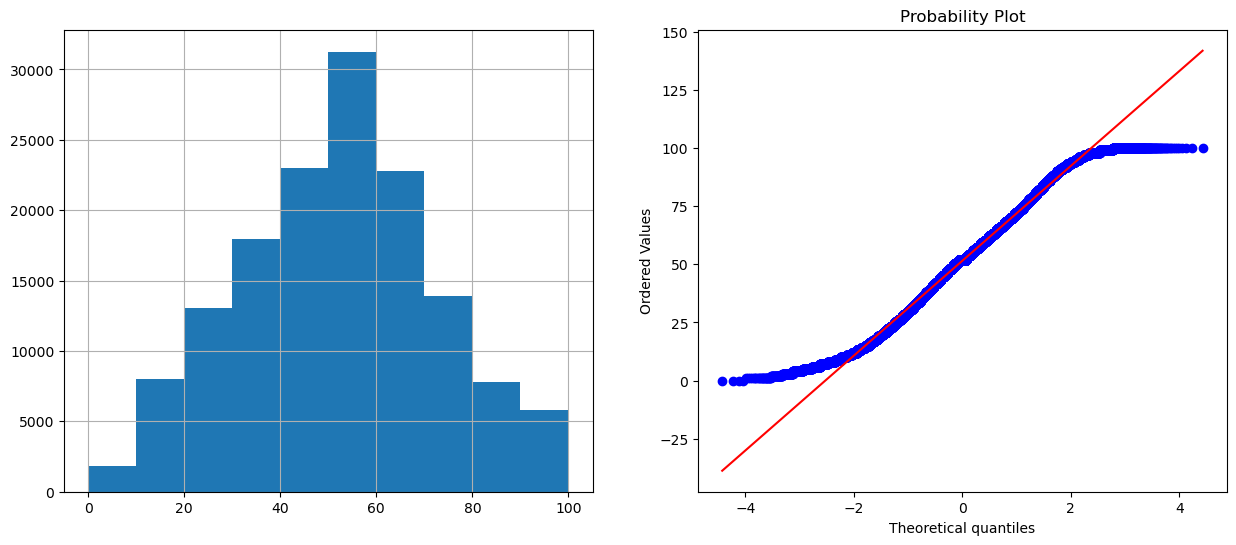

Pressure9am


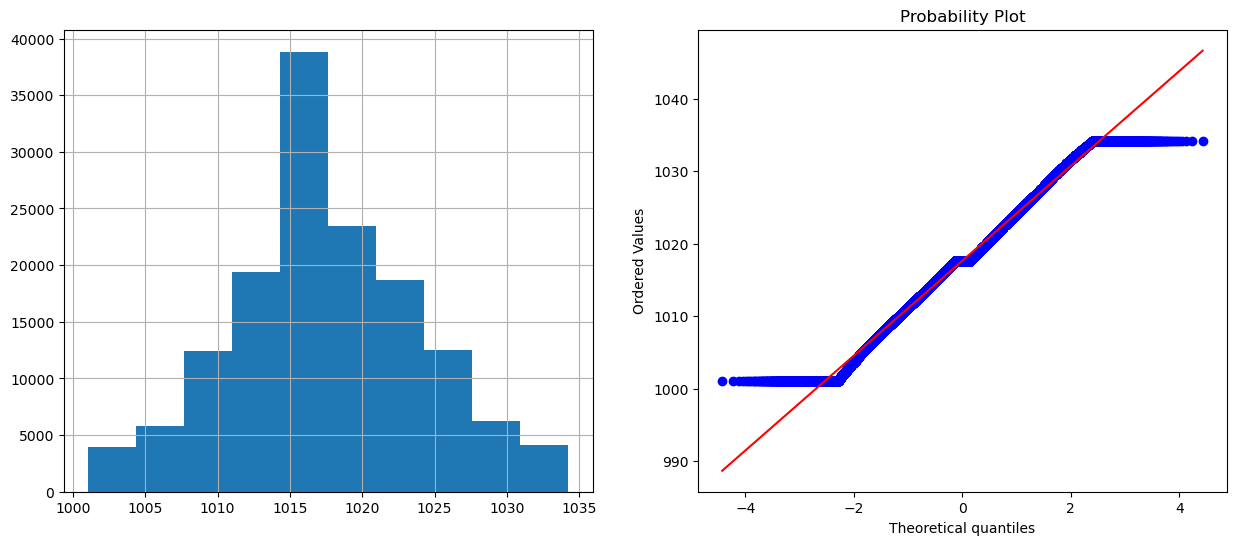

Pressure3pm


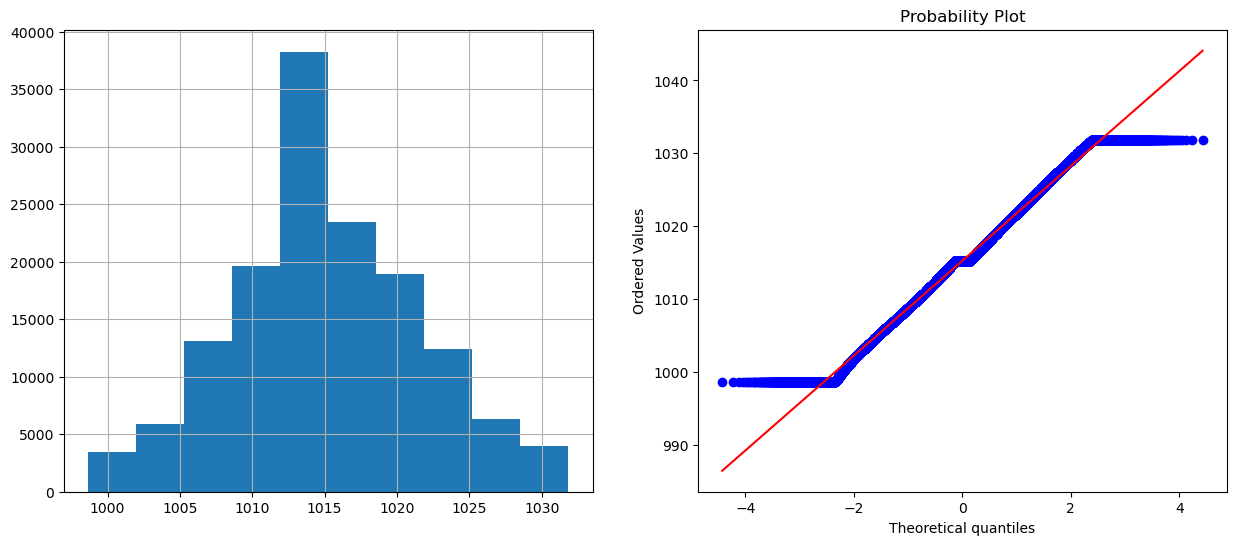

Temp9am


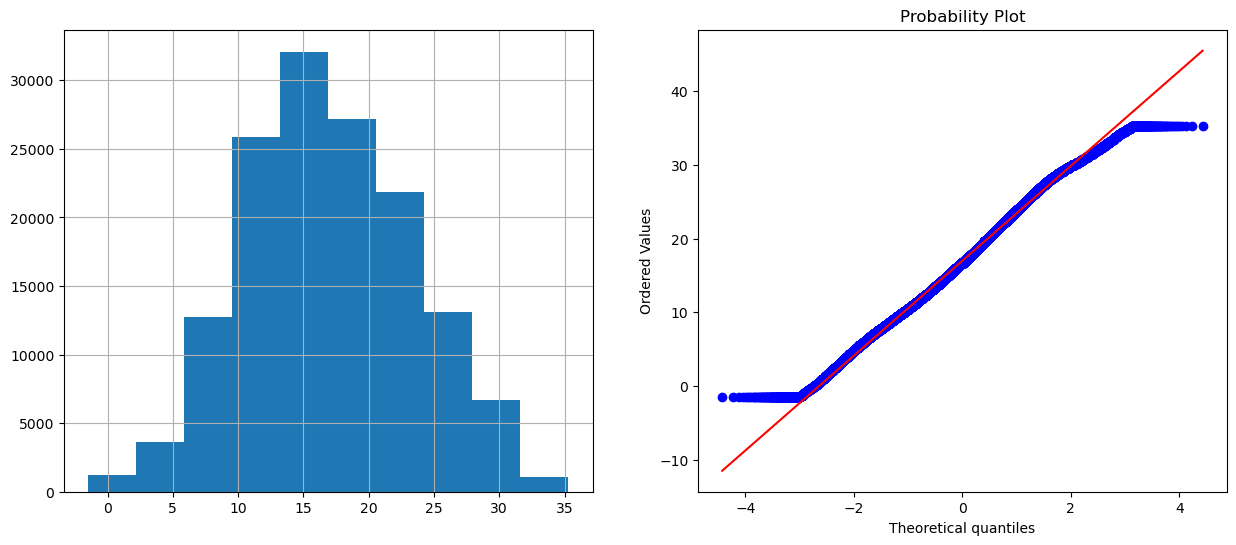

Temp3pm


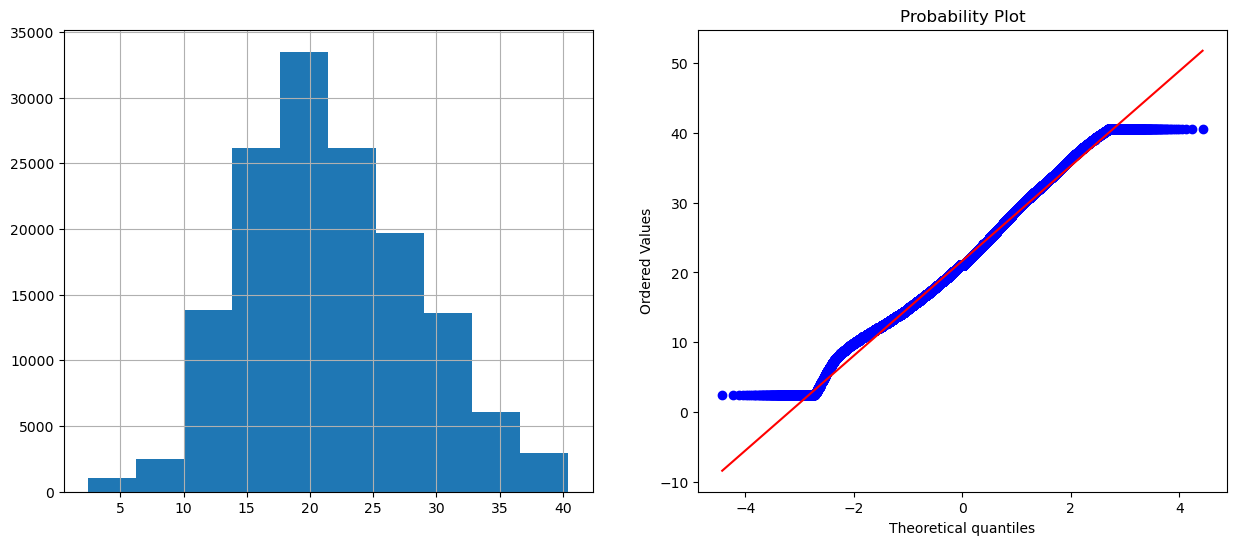

In [58]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [59]:
df.to_csv("preprocessed_1.csv", index=False)

In [60]:
X = df.drop(["CloudBurstTomorrow", "Date"], axis=1)
Y = df["CloudBurstTomorrow"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [62]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: CloudBurstTomorrow, Length: 116368, dtype: uint8

In [63]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [64]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 172ms	remaining: 5m 42s
1:	total: 198ms	remaining: 3m 17s
2:	total: 224ms	remaining: 2m 28s
3:	total: 249ms	remaining: 2m 4s
4:	total: 276ms	remaining: 1m 50s
5:	total: 301ms	remaining: 1m 40s
6:	total: 327ms	remaining: 1m 33s
7:	total: 355ms	remaining: 1m 28s
8:	total: 383ms	remaining: 1m 24s
9:	total: 417ms	remaining: 1m 22s
10:	total: 444ms	remaining: 1m 20s
11:	total: 470ms	remaining: 1m 17s
12:	total: 495ms	remaining: 1m 15s
13:	total: 522ms	remaining: 1m 14s
14:	total: 548ms	remaining: 1m 12s
15:	total: 573ms	remaining: 1m 11s
16:	total: 600ms	remaining: 1m 10s
17:	total: 628ms	remaining: 1m 9s
18:	total: 655ms	remaining: 1m 8s
19:	total: 682ms	remaining: 1m 7s
20:	total: 709ms	remaining: 1m 6s
21:	total: 736ms	remaining: 1m 6s
22:	total: 763ms	remaining: 1m 5s
23:	total: 789ms	remaining: 1m 4s
24:	total: 817ms	remaining: 1m 4s
25:	total: 844ms	remaining: 1m 4s
26:	total: 877ms	remaining: 1m 4s
27:	total: 904ms	remaining: 1m 3s
28:	total: 9

238:	total: 6.58s	remaining: 48.5s
239:	total: 6.61s	remaining: 48.5s
240:	total: 6.63s	remaining: 48.4s
241:	total: 6.66s	remaining: 48.4s
242:	total: 6.68s	remaining: 48.3s
243:	total: 6.71s	remaining: 48.3s
244:	total: 6.73s	remaining: 48.2s
245:	total: 6.76s	remaining: 48.2s
246:	total: 6.78s	remaining: 48.2s
247:	total: 6.82s	remaining: 48.1s
248:	total: 6.84s	remaining: 48.1s
249:	total: 6.87s	remaining: 48.1s
250:	total: 6.89s	remaining: 48s
251:	total: 6.92s	remaining: 48s
252:	total: 6.95s	remaining: 48s
253:	total: 6.97s	remaining: 47.9s
254:	total: 6.99s	remaining: 47.9s
255:	total: 7.02s	remaining: 47.8s
256:	total: 7.05s	remaining: 47.8s
257:	total: 7.07s	remaining: 47.8s
258:	total: 7.1s	remaining: 47.7s
259:	total: 7.13s	remaining: 47.7s
260:	total: 7.15s	remaining: 47.6s
261:	total: 7.17s	remaining: 47.6s
262:	total: 7.2s	remaining: 47.5s
263:	total: 7.22s	remaining: 47.5s
264:	total: 7.25s	remaining: 47.5s
265:	total: 7.27s	remaining: 47.4s
266:	total: 7.31s	remaining:

477:	total: 13s	remaining: 41.3s
478:	total: 13s	remaining: 41.3s
479:	total: 13s	remaining: 41.2s
480:	total: 13s	remaining: 41.2s
481:	total: 13.1s	remaining: 41.2s
482:	total: 13.1s	remaining: 41.1s
483:	total: 13.1s	remaining: 41.1s
484:	total: 13.1s	remaining: 41.1s
485:	total: 13.2s	remaining: 41s
486:	total: 13.2s	remaining: 41s
487:	total: 13.2s	remaining: 41s
488:	total: 13.3s	remaining: 40.9s
489:	total: 13.3s	remaining: 40.9s
490:	total: 13.3s	remaining: 40.9s
491:	total: 13.3s	remaining: 40.8s
492:	total: 13.3s	remaining: 40.8s
493:	total: 13.4s	remaining: 40.8s
494:	total: 13.4s	remaining: 40.8s
495:	total: 13.5s	remaining: 40.8s
496:	total: 13.5s	remaining: 40.8s
497:	total: 13.5s	remaining: 40.8s
498:	total: 13.5s	remaining: 40.8s
499:	total: 13.6s	remaining: 40.7s
500:	total: 13.6s	remaining: 40.7s
501:	total: 13.6s	remaining: 40.7s
502:	total: 13.7s	remaining: 40.6s
503:	total: 13.7s	remaining: 40.6s
504:	total: 13.7s	remaining: 40.6s
505:	total: 13.7s	remaining: 40.6s

715:	total: 21.3s	remaining: 38.2s
716:	total: 21.3s	remaining: 38.1s
717:	total: 21.3s	remaining: 38.1s
718:	total: 21.4s	remaining: 38.1s
719:	total: 21.4s	remaining: 38s
720:	total: 21.4s	remaining: 38s
721:	total: 21.5s	remaining: 38s
722:	total: 21.5s	remaining: 38s
723:	total: 21.5s	remaining: 37.9s
724:	total: 21.6s	remaining: 37.9s
725:	total: 21.6s	remaining: 37.9s
726:	total: 21.6s	remaining: 37.9s
727:	total: 21.6s	remaining: 37.8s
728:	total: 21.7s	remaining: 37.8s
729:	total: 21.7s	remaining: 37.8s
730:	total: 21.7s	remaining: 37.7s
731:	total: 21.8s	remaining: 37.7s
732:	total: 21.8s	remaining: 37.7s
733:	total: 21.8s	remaining: 37.6s
734:	total: 21.9s	remaining: 37.6s
735:	total: 21.9s	remaining: 37.6s
736:	total: 21.9s	remaining: 37.6s
737:	total: 21.9s	remaining: 37.5s
738:	total: 22s	remaining: 37.5s
739:	total: 22s	remaining: 37.5s
740:	total: 22s	remaining: 37.4s
741:	total: 22.1s	remaining: 37.4s
742:	total: 22.1s	remaining: 37.4s
743:	total: 22.1s	remaining: 37.3s

955:	total: 28.7s	remaining: 31.4s
956:	total: 28.8s	remaining: 31.4s
957:	total: 28.8s	remaining: 31.3s
958:	total: 28.8s	remaining: 31.3s
959:	total: 28.9s	remaining: 31.3s
960:	total: 28.9s	remaining: 31.2s
961:	total: 28.9s	remaining: 31.2s
962:	total: 28.9s	remaining: 31.2s
963:	total: 29s	remaining: 31.1s
964:	total: 29s	remaining: 31.1s
965:	total: 29s	remaining: 31.1s
966:	total: 29.1s	remaining: 31s
967:	total: 29.1s	remaining: 31s
968:	total: 29.1s	remaining: 31s
969:	total: 29.1s	remaining: 30.9s
970:	total: 29.2s	remaining: 30.9s
971:	total: 29.2s	remaining: 30.9s
972:	total: 29.2s	remaining: 30.8s
973:	total: 29.3s	remaining: 30.8s
974:	total: 29.3s	remaining: 30.8s
975:	total: 29.3s	remaining: 30.7s
976:	total: 29.3s	remaining: 30.7s
977:	total: 29.4s	remaining: 30.7s
978:	total: 29.4s	remaining: 30.6s
979:	total: 29.4s	remaining: 30.6s
980:	total: 29.4s	remaining: 30.6s
981:	total: 29.5s	remaining: 30.5s
982:	total: 29.5s	remaining: 30.5s
983:	total: 29.5s	remaining: 30.

1193:	total: 35.2s	remaining: 23.8s
1194:	total: 35.2s	remaining: 23.7s
1195:	total: 35.3s	remaining: 23.7s
1196:	total: 35.3s	remaining: 23.7s
1197:	total: 35.3s	remaining: 23.6s
1198:	total: 35.3s	remaining: 23.6s
1199:	total: 35.4s	remaining: 23.6s
1200:	total: 35.4s	remaining: 23.5s
1201:	total: 35.4s	remaining: 23.5s
1202:	total: 35.4s	remaining: 23.5s
1203:	total: 35.5s	remaining: 23.4s
1204:	total: 35.5s	remaining: 23.4s
1205:	total: 35.5s	remaining: 23.4s
1206:	total: 35.5s	remaining: 23.3s
1207:	total: 35.6s	remaining: 23.3s
1208:	total: 35.6s	remaining: 23.3s
1209:	total: 35.6s	remaining: 23.3s
1210:	total: 35.6s	remaining: 23.2s
1211:	total: 35.7s	remaining: 23.2s
1212:	total: 35.7s	remaining: 23.2s
1213:	total: 35.7s	remaining: 23.1s
1214:	total: 35.7s	remaining: 23.1s
1215:	total: 35.8s	remaining: 23.1s
1216:	total: 35.8s	remaining: 23s
1217:	total: 35.8s	remaining: 23s
1218:	total: 35.8s	remaining: 23s
1219:	total: 35.9s	remaining: 22.9s
1220:	total: 35.9s	remaining: 22.9

1424:	total: 41.2s	remaining: 16.6s
1425:	total: 41.2s	remaining: 16.6s
1426:	total: 41.2s	remaining: 16.6s
1427:	total: 41.3s	remaining: 16.5s
1428:	total: 41.3s	remaining: 16.5s
1429:	total: 41.3s	remaining: 16.5s
1430:	total: 41.3s	remaining: 16.4s
1431:	total: 41.4s	remaining: 16.4s
1432:	total: 41.4s	remaining: 16.4s
1433:	total: 41.4s	remaining: 16.3s
1434:	total: 41.4s	remaining: 16.3s
1435:	total: 41.5s	remaining: 16.3s
1436:	total: 41.5s	remaining: 16.3s
1437:	total: 41.5s	remaining: 16.2s
1438:	total: 41.5s	remaining: 16.2s
1439:	total: 41.6s	remaining: 16.2s
1440:	total: 41.6s	remaining: 16.1s
1441:	total: 41.6s	remaining: 16.1s
1442:	total: 41.6s	remaining: 16.1s
1443:	total: 41.7s	remaining: 16s
1444:	total: 41.7s	remaining: 16s
1445:	total: 41.7s	remaining: 16s
1446:	total: 41.7s	remaining: 15.9s
1447:	total: 41.8s	remaining: 15.9s
1448:	total: 41.8s	remaining: 15.9s
1449:	total: 41.8s	remaining: 15.9s
1450:	total: 41.8s	remaining: 15.8s
1451:	total: 41.9s	remaining: 15.8

1659:	total: 47.3s	remaining: 9.7s
1660:	total: 47.4s	remaining: 9.67s
1661:	total: 47.4s	remaining: 9.64s
1662:	total: 47.5s	remaining: 9.63s
1663:	total: 47.6s	remaining: 9.61s
1664:	total: 47.6s	remaining: 9.58s
1665:	total: 47.6s	remaining: 9.55s
1666:	total: 47.7s	remaining: 9.52s
1667:	total: 47.7s	remaining: 9.49s
1668:	total: 47.7s	remaining: 9.46s
1669:	total: 47.8s	remaining: 9.44s
1670:	total: 47.8s	remaining: 9.41s
1671:	total: 47.9s	remaining: 9.39s
1672:	total: 48s	remaining: 9.37s
1673:	total: 48s	remaining: 9.36s
1674:	total: 48.1s	remaining: 9.33s
1675:	total: 48.1s	remaining: 9.31s
1676:	total: 48.2s	remaining: 9.28s
1677:	total: 48.2s	remaining: 9.25s
1678:	total: 48.2s	remaining: 9.22s
1679:	total: 48.3s	remaining: 9.2s
1680:	total: 48.3s	remaining: 9.17s
1681:	total: 48.3s	remaining: 9.14s
1682:	total: 48.4s	remaining: 9.11s
1683:	total: 48.4s	remaining: 9.08s
1684:	total: 48.4s	remaining: 9.05s
1685:	total: 48.4s	remaining: 9.02s
1686:	total: 48.5s	remaining: 8.99

1890:	total: 54.4s	remaining: 3.13s
1891:	total: 54.4s	remaining: 3.11s
1892:	total: 54.4s	remaining: 3.08s
1893:	total: 54.5s	remaining: 3.05s
1894:	total: 54.5s	remaining: 3.02s
1895:	total: 54.5s	remaining: 2.99s
1896:	total: 54.5s	remaining: 2.96s
1897:	total: 54.6s	remaining: 2.93s
1898:	total: 54.6s	remaining: 2.9s
1899:	total: 54.6s	remaining: 2.87s
1900:	total: 54.6s	remaining: 2.85s
1901:	total: 54.7s	remaining: 2.82s
1902:	total: 54.7s	remaining: 2.79s
1903:	total: 54.7s	remaining: 2.76s
1904:	total: 54.7s	remaining: 2.73s
1905:	total: 54.8s	remaining: 2.7s
1906:	total: 54.8s	remaining: 2.67s
1907:	total: 54.8s	remaining: 2.64s
1908:	total: 54.9s	remaining: 2.61s
1909:	total: 54.9s	remaining: 2.58s
1910:	total: 54.9s	remaining: 2.56s
1911:	total: 54.9s	remaining: 2.53s
1912:	total: 55s	remaining: 2.5s
1913:	total: 55s	remaining: 2.47s
1914:	total: 55s	remaining: 2.44s
1915:	total: 55s	remaining: 2.41s
1916:	total: 55.1s	remaining: 2.38s
1917:	total: 55.1s	remaining: 2.35s
191

In [65]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21507  1210]
 [ 2940  3435]]
0.8573490994087721
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22717
           1       0.74      0.54      0.62      6375

    accuracy                           0.86     29092
   macro avg       0.81      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092



In [66]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [67]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20649  2068]
 [ 2508  3867]]
0.8427058985288052
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.61      0.63      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.76     29092
weighted avg       0.84      0.84      0.84     29092



In [68]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

C:\Users\zeel sheth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17665  5052]
 [ 1531  4844]]
0.7737178605802283
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     22717
           1       0.49      0.76      0.60      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.77      0.79     29092



In [70]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [71]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[17185  5532]
 [ 1685  4690]]
0.7519249278152069
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     22717
           1       0.46      0.74      0.57      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.75      0.70     29092
weighted avg       0.81      0.75      0.77     29092



C:\Users\zeel sheth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7460841021710443

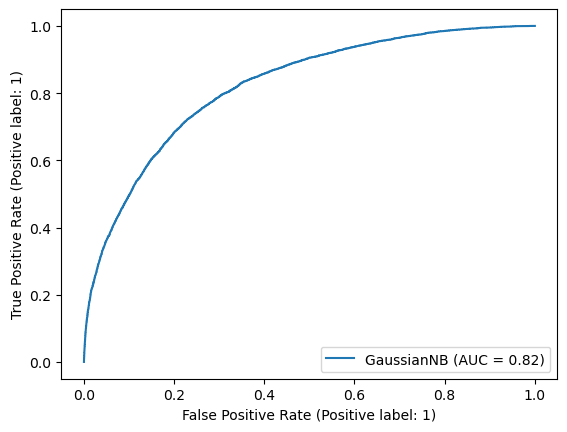

In [72]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [74]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

C:\Users\zeel sheth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[17217  5500]
 [ 1890  4485]]
0.7459782758146569
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     22717
           1       0.45      0.70      0.55      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.73      0.69     29092
weighted avg       0.80      0.75      0.76     29092



In [75]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[21341  1376]
 [ 2958  3417]]
0.851024336587378
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22717
           1       0.71      0.54      0.61      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.74      0.76     29092
weighted avg       0.84      0.85      0.84     29092



In [77]:
#svc = SVC()
#svc.fit(X_train_res, y_train_res)

In [78]:
#y_pred5 = svc.predict(X_test)
#print(confusion_matrix(y_test,y_pred5))
#print(accuracy_score(y_test,y_pred5))
#print(classification_report(y_test,y_pred5))

In [79]:
#metrics.plot_roc_curve(svc, X_test, y_test)
#metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [80]:
# joblib.dump(rf, "rf.pkl")
# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
# joblib.dump(knn, "knn.pkl")
#joblib.dump(svc, "svc.pkl")
#joblib.dump(xgb, "xgb.pkl")


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
df = pd.read_csv("cloudburst.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Almora     13.4     22.9       0.6          NaN       NaN   
1  02-12-2008   Almora      7.4     25.1       0.0          NaN       NaN   
2  03-12-2008   Almora     12.9     25.7       0.0          NaN       NaN   
3  04-12-2008   Almora      9.2     28.0       0.0          NaN       NaN   
4  05-12-2008   Almora     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm CloudBurst Today CloudBurstTomorrow  
0       NaN     16.9     21.8               No                 No  
1       NaN     17.2     24.3               No                 No  
2       2.0     21.0     23.2               No                 No  
3       NaN     18.1     26.5               No                 No  
4       8.0     17.8     29.7               No                 No

In [83]:
df.dtypes

Date                   object
Location               object
MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
WindGustDir            object
WindGustSpeed         float64
WindDir9am             object
WindDir3pm             object
WindSpeed9am          float64
WindSpeed3pm          float64
Humidity9am           float64
Humidity3pm           float64
Pressure9am           float64
Pressure3pm           float64
Cloud9am              float64
Cloud3pm              float64
Temp9am               float64
Temp3pm               float64
CloudBurst Today       object
CloudBurstTomorrow     object
dtype: object

In [84]:
df1 = pd.get_dummies(data = df,columns=['WindGustDir','Date','Location','WindDir3pm','WindDir9am'])
df1

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
145455      2.8     23.4       0.0          NaN       NaN           31.0   
145456      3.6     25.3       0.0          NaN       NaN           22.0   
145457      5.4     26.9       0.0          NaN       NaN           37.0   
145458      7.8     27.0       0.0          NaN       NaN           28.0   
145459     14.9      NaN       0.0          NaN       NaN            NaN   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm CloudBurst Today  \
0            1007.1       8.0       NaN     16.9     21.8               No   
1            1007.8       NaN       NaN     17.2     24.3               No   
2            1008.7       NaN       2.0     21.0     23.2               No   
3            1012.8       NaN       NaN     18.1     26.5               No   
4            1006.0       7.0       8.0     17.8     29.7               No   
...             ...       ...       ...      ...      ...              ...   
145455       1020.3       NaN       NaN     10.1     22.4               No   
145456       1019.1       NaN       NaN     10.9     24.5               No   
145457       1016.8       NaN       NaN     12.5     26.1               No   
145458       1016.5       3.0       2.0     15.1     26.0               No   
145459       1017.9       8.0       8.0     15.0     20.9               No   

       CloudBurstTomorrow  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0                      No              0                0                0   
1                      No              0                0                0   
2                      No              0                0                0   
3                      No              0                0                0   
4                      No              0                0                0   
...                   ...            ...              ...              ...   
145455                 No              1                0                0   
145456                 No              0                0                0   
145457                 No              0                0                0   
145458                 No              0                0                0   
145459                NaN              0                0                0   

        WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0                   0               0                0                0   
1                   0               0                0                0   
2                   0               0                0                0

In [85]:
def print_uniq_val(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [86]:
print_uniq_val(df1)

MinTemp : [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.   0.8 -0.1  1.3  3.3  6.5 -0.8
  1.9  6.8  2.7  1.6  5.5  7.3  0.2  5.8  7.1  1.1  1.   6.1  nan  5.3
  4.  11.7  8.5  3.8  6.4  9.5 14.5 15.6 17.8 16.7 18.1 12.1 11.4 18.3
 11.9 21.  11.1 18.2 14.2 11.8 13.6 12.7 15.1 22.9 17.6 21.1 19.4 14.

Date_01-11-2008 : [0 1]
Date_01-11-2009 : [0 1]
Date_01-11-2010 : [0 1]
Date_01-11-2011 : [0 1]
Date_01-11-2012 : [0 1]
Date_01-11-2013 : [0 1]
Date_01-11-2014 : [0 1]
Date_01-11-2015 : [0 1]
Date_01-11-2016 : [0 1]
Date_01-12-2007 : [0 1]
Date_01-12-2008 : [1 0]
Date_01-12-2009 : [0 1]
Date_01-12-2010 : [0 1]
Date_01-12-2011 : [0 1]
Date_01-12-2013 : [0 1]
Date_01-12-2014 : [0 1]
Date_01-12-2015 : [0 1]
Date_01-12-2016 : [0 1]
Date_02-01-2008 : [0 1]
Date_02-01-2009 : [0 1]
Date_02-01-2010 : [0 1]
Date_02-01-2011 : [0 1]
Date_02-01-2012 : [0 1]
Date_02-01-2013 : [0 1]
Date_02-01-2014 : [0 1]
Date_02-01-2015 : [0 1]
Date_02-01-2016 : [0 1]
Date_02-01-2017 : [0 1]
Date_02-02-2008 : [0 1]
Date_02-02-2009 : [0 1]
Date_02-02-2010 : [0 1]
Date_02-02-2011 : [0 1]
Date_02-02-2012 : [0 1]
Date_02-02-2014 : [0 1]
Date_02-02-2015 : [0 1]
Date_02-02-2016 : [0 1]
Date_02-02-2017 : [0 1]
Date_02-03-2008 : [0 1]
Date_02-03-2009 : [0 1]
Date_02-03-2010 : [0 1]
Date_02-03-2011 : [0 1]
Date_02-03-2012 

Date_04-11-2013 : [0 1]
Date_04-11-2014 : [0 1]
Date_04-11-2015 : [0 1]
Date_04-11-2016 : [0 1]
Date_04-12-2007 : [0 1]
Date_04-12-2008 : [0 1]
Date_04-12-2009 : [0 1]
Date_04-12-2010 : [0 1]
Date_04-12-2011 : [0 1]
Date_04-12-2013 : [0 1]
Date_04-12-2014 : [0 1]
Date_04-12-2015 : [0 1]
Date_04-12-2016 : [0 1]
Date_05-01-2008 : [0 1]
Date_05-01-2009 : [0 1]
Date_05-01-2010 : [0 1]
Date_05-01-2011 : [0 1]
Date_05-01-2012 : [0 1]
Date_05-01-2013 : [0 1]
Date_05-01-2014 : [0 1]
Date_05-01-2015 : [0 1]
Date_05-01-2016 : [0 1]
Date_05-01-2017 : [0 1]
Date_05-02-2008 : [0 1]
Date_05-02-2009 : [0 1]
Date_05-02-2010 : [0 1]
Date_05-02-2011 : [0 1]
Date_05-02-2012 : [0 1]
Date_05-02-2014 : [0 1]
Date_05-02-2015 : [0 1]
Date_05-02-2016 : [0 1]
Date_05-02-2017 : [0 1]
Date_05-03-2008 : [0 1]
Date_05-03-2009 : [0 1]
Date_05-03-2010 : [0 1]
Date_05-03-2011 : [0 1]
Date_05-03-2012 : [0 1]
Date_05-03-2013 : [0 1]
Date_05-03-2014 : [0 1]
Date_05-03-2015 : [0 1]
Date_05-03-2016 : [0 1]
Date_05-03-2017 

Date_07-12-2015 : [0 1]
Date_07-12-2016 : [0 1]
Date_08-01-2008 : [0 1]
Date_08-01-2009 : [0 1]
Date_08-01-2010 : [0 1]
Date_08-01-2011 : [0 1]
Date_08-01-2012 : [0 1]
Date_08-01-2013 : [0 1]
Date_08-01-2014 : [0 1]
Date_08-01-2015 : [0 1]
Date_08-01-2016 : [0 1]
Date_08-01-2017 : [0 1]
Date_08-02-2008 : [0 1]
Date_08-02-2009 : [0 1]
Date_08-02-2010 : [0 1]
Date_08-02-2011 : [0 1]
Date_08-02-2012 : [0 1]
Date_08-02-2014 : [0 1]
Date_08-02-2015 : [0 1]
Date_08-02-2016 : [0 1]
Date_08-02-2017 : [0 1]
Date_08-03-2008 : [0 1]
Date_08-03-2009 : [0 1]
Date_08-03-2010 : [0 1]
Date_08-03-2011 : [0 1]
Date_08-03-2012 : [0 1]
Date_08-03-2013 : [0 1]
Date_08-03-2014 : [0 1]
Date_08-03-2015 : [0 1]
Date_08-03-2016 : [0 1]
Date_08-03-2017 : [0 1]
Date_08-04-2008 : [0 1]
Date_08-04-2009 : [0 1]
Date_08-04-2010 : [0 1]
Date_08-04-2012 : [0 1]
Date_08-04-2013 : [0 1]
Date_08-04-2014 : [0 1]
Date_08-04-2015 : [0 1]
Date_08-04-2016 : [0 1]
Date_08-04-2017 : [0 1]
Date_08-05-2008 : [0 1]
Date_08-05-2009 

Date_11-05-2013 : [0 1]
Date_11-05-2014 : [0 1]
Date_11-05-2015 : [0 1]
Date_11-05-2016 : [0 1]
Date_11-05-2017 : [0 1]
Date_11-06-2008 : [0 1]
Date_11-06-2009 : [0 1]
Date_11-06-2010 : [0 1]
Date_11-06-2011 : [0 1]
Date_11-06-2012 : [0 1]
Date_11-06-2013 : [0 1]
Date_11-06-2014 : [0 1]
Date_11-06-2015 : [0 1]
Date_11-06-2016 : [0 1]
Date_11-06-2017 : [0 1]
Date_11-07-2008 : [0 1]
Date_11-07-2009 : [0 1]
Date_11-07-2010 : [0 1]
Date_11-07-2011 : [0 1]
Date_11-07-2012 : [0 1]
Date_11-07-2013 : [0 1]
Date_11-07-2014 : [0 1]
Date_11-07-2015 : [0 1]
Date_11-07-2016 : [0 1]
Date_11-08-2008 : [0 1]
Date_11-08-2009 : [0 1]
Date_11-08-2010 : [0 1]
Date_11-08-2011 : [0 1]
Date_11-08-2012 : [0 1]
Date_11-08-2013 : [0 1]
Date_11-08-2014 : [0 1]
Date_11-08-2015 : [0 1]
Date_11-08-2016 : [0 1]
Date_11-09-2008 : [0 1]
Date_11-09-2009 : [0 1]
Date_11-09-2010 : [0 1]
Date_11-09-2011 : [0 1]
Date_11-09-2012 : [0 1]
Date_11-09-2013 : [0 1]
Date_11-09-2014 : [0 1]
Date_11-09-2015 : [0 1]
Date_11-09-2016 

Date_14-10-2013 : [0 1]
Date_14-10-2014 : [0 1]
Date_14-10-2015 : [0 1]
Date_14-10-2016 : [0 1]
Date_14-11-2007 : [0 1]
Date_14-11-2008 : [0 1]
Date_14-11-2009 : [0 1]
Date_14-11-2010 : [0 1]
Date_14-11-2011 : [0 1]
Date_14-11-2012 : [0 1]
Date_14-11-2013 : [0 1]
Date_14-11-2014 : [0 1]
Date_14-11-2015 : [0 1]
Date_14-11-2016 : [0 1]
Date_14-12-2007 : [0 1]
Date_14-12-2008 : [0 1]
Date_14-12-2009 : [0 1]
Date_14-12-2010 : [0 1]
Date_14-12-2011 : [0 1]
Date_14-12-2013 : [0 1]
Date_14-12-2014 : [0 1]
Date_14-12-2015 : [0 1]
Date_14-12-2016 : [0 1]
Date_15-01-2008 : [0 1]
Date_15-01-2009 : [0 1]
Date_15-01-2010 : [0 1]
Date_15-01-2011 : [0 1]
Date_15-01-2012 : [0 1]
Date_15-01-2013 : [0 1]
Date_15-01-2014 : [0 1]
Date_15-01-2015 : [0 1]
Date_15-01-2016 : [0 1]
Date_15-01-2017 : [0 1]
Date_15-02-2008 : [0 1]
Date_15-02-2009 : [0 1]
Date_15-02-2010 : [0 1]
Date_15-02-2011 : [0 1]
Date_15-02-2012 : [0 1]
Date_15-02-2014 : [0 1]
Date_15-02-2015 : [0 1]
Date_15-02-2016 : [0 1]
Date_15-02-2017 

Date_18-07-2013 : [0 1]
Date_18-07-2014 : [0 1]
Date_18-07-2015 : [0 1]
Date_18-07-2016 : [0 1]
Date_18-08-2008 : [0 1]
Date_18-08-2009 : [0 1]
Date_18-08-2010 : [0 1]
Date_18-08-2011 : [0 1]
Date_18-08-2012 : [0 1]
Date_18-08-2013 : [0 1]
Date_18-08-2014 : [0 1]
Date_18-08-2015 : [0 1]
Date_18-08-2016 : [0 1]
Date_18-09-2008 : [0 1]
Date_18-09-2009 : [0 1]
Date_18-09-2010 : [0 1]
Date_18-09-2011 : [0 1]
Date_18-09-2012 : [0 1]
Date_18-09-2013 : [0 1]
Date_18-09-2014 : [0 1]
Date_18-09-2015 : [0 1]
Date_18-09-2016 : [0 1]
Date_18-10-2008 : [0 1]
Date_18-10-2009 : [0 1]
Date_18-10-2010 : [0 1]
Date_18-10-2011 : [0 1]
Date_18-10-2012 : [0 1]
Date_18-10-2013 : [0 1]
Date_18-10-2014 : [0 1]
Date_18-10-2015 : [0 1]
Date_18-10-2016 : [0 1]
Date_18-11-2007 : [0 1]
Date_18-11-2008 : [0 1]
Date_18-11-2009 : [0 1]
Date_18-11-2010 : [0 1]
Date_18-11-2011 : [0 1]
Date_18-11-2012 : [0 1]
Date_18-11-2013 : [0 1]
Date_18-11-2014 : [0 1]
Date_18-11-2015 : [0 1]
Date_18-11-2016 : [0 1]
Date_18-12-2007 

Date_21-12-2009 : [0 1]
Date_21-12-2010 : [0 1]
Date_21-12-2011 : [0 1]
Date_21-12-2013 : [0 1]
Date_21-12-2014 : [0 1]
Date_21-12-2015 : [0 1]
Date_21-12-2016 : [0 1]
Date_22-01-2008 : [0 1]
Date_22-01-2009 : [0 1]
Date_22-01-2010 : [0 1]
Date_22-01-2011 : [0 1]
Date_22-01-2012 : [0 1]
Date_22-01-2013 : [0 1]
Date_22-01-2014 : [0 1]
Date_22-01-2015 : [0 1]
Date_22-01-2016 : [0 1]
Date_22-01-2017 : [0 1]
Date_22-02-2008 : [0 1]
Date_22-02-2009 : [0 1]
Date_22-02-2010 : [0 1]
Date_22-02-2011 : [0 1]
Date_22-02-2012 : [0 1]
Date_22-02-2014 : [0 1]
Date_22-02-2015 : [0 1]
Date_22-02-2016 : [0 1]
Date_22-02-2017 : [0 1]
Date_22-03-2008 : [0 1]
Date_22-03-2009 : [0 1]
Date_22-03-2010 : [0 1]
Date_22-03-2011 : [0 1]
Date_22-03-2012 : [0 1]
Date_22-03-2013 : [0 1]
Date_22-03-2014 : [0 1]
Date_22-03-2015 : [0 1]
Date_22-03-2016 : [0 1]
Date_22-03-2017 : [0 1]
Date_22-04-2008 : [0 1]
Date_22-04-2009 : [0 1]
Date_22-04-2010 : [0 1]
Date_22-04-2012 : [0 1]
Date_22-04-2013 : [0 1]
Date_22-04-2014 

Date_25-05-2009 : [0 1]
Date_25-05-2010 : [0 1]
Date_25-05-2011 : [0 1]
Date_25-05-2012 : [0 1]
Date_25-05-2013 : [0 1]
Date_25-05-2014 : [0 1]
Date_25-05-2015 : [0 1]
Date_25-05-2016 : [0 1]
Date_25-05-2017 : [0 1]
Date_25-06-2008 : [0 1]
Date_25-06-2009 : [0 1]
Date_25-06-2010 : [0 1]
Date_25-06-2011 : [0 1]
Date_25-06-2012 : [0 1]
Date_25-06-2013 : [0 1]
Date_25-06-2014 : [0 1]
Date_25-06-2015 : [0 1]
Date_25-06-2016 : [0 1]
Date_25-06-2017 : [0 1]
Date_25-07-2008 : [0 1]
Date_25-07-2009 : [0 1]
Date_25-07-2010 : [0 1]
Date_25-07-2011 : [0 1]
Date_25-07-2012 : [0 1]
Date_25-07-2013 : [0 1]
Date_25-07-2014 : [0 1]
Date_25-07-2015 : [0 1]
Date_25-07-2016 : [0 1]
Date_25-08-2008 : [0 1]
Date_25-08-2009 : [0 1]
Date_25-08-2010 : [0 1]
Date_25-08-2011 : [0 1]
Date_25-08-2012 : [0 1]
Date_25-08-2013 : [0 1]
Date_25-08-2014 : [0 1]
Date_25-08-2015 : [0 1]
Date_25-08-2016 : [0 1]
Date_25-09-2008 : [0 1]
Date_25-09-2009 : [0 1]
Date_25-09-2010 : [0 1]
Date_25-09-2011 : [0 1]
Date_25-09-2012 

Date_28-10-2008 : [0 1]
Date_28-10-2009 : [0 1]
Date_28-10-2010 : [0 1]
Date_28-10-2011 : [0 1]
Date_28-10-2012 : [0 1]
Date_28-10-2013 : [0 1]
Date_28-10-2014 : [0 1]
Date_28-10-2015 : [0 1]
Date_28-10-2016 : [0 1]
Date_28-11-2007 : [0 1]
Date_28-11-2008 : [0 1]
Date_28-11-2009 : [0 1]
Date_28-11-2010 : [0 1]
Date_28-11-2011 : [0 1]
Date_28-11-2012 : [0 1]
Date_28-11-2013 : [0 1]
Date_28-11-2014 : [0 1]
Date_28-11-2015 : [0 1]
Date_28-11-2016 : [0 1]
Date_28-12-2007 : [0 1]
Date_28-12-2008 : [0 1]
Date_28-12-2009 : [0 1]
Date_28-12-2010 : [0 1]
Date_28-12-2011 : [0 1]
Date_28-12-2013 : [0 1]
Date_28-12-2014 : [0 1]
Date_28-12-2015 : [0 1]
Date_28-12-2016 : [0 1]
Date_29-01-2008 : [0 1]
Date_29-01-2009 : [0 1]
Date_29-01-2010 : [0 1]
Date_29-01-2011 : [0 1]
Date_29-01-2012 : [0 1]
Date_29-01-2013 : [0 1]
Date_29-01-2014 : [0 1]
Date_29-01-2015 : [0 1]
Date_29-01-2016 : [0 1]
Date_29-01-2017 : [0 1]
Date_29-02-2008 : [0 1]
Date_29-02-2012 : [0 1]
Date_29-02-2016 : [0 1]
Date_29-03-2008 

In [87]:
df1.replace('Yes',1,inplace=True)
df1.replace('No',0,inplace=True)
df1.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  CloudBurst Today  \
0       1007.1       8.0       NaN     16.9     21.8               0.0   
1       1007.8       NaN       NaN     17.2     24.3               0.0   
2       1008.7       NaN       2.0     21.0     23.2               0.0   
3       1012.8       NaN       NaN     18.1     26.5               0.0   
4       1006.0       7.0       8.0     17.8     29.7               0.0   

   CloudBurstTomorrow  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0                 0.0              0                0                0   
1                 0.0              0                0                0   
2                 0.0              0                0                0   
3                 0.0              0                0                0   
4                 0.0              0                0                0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0              0               0                0                0   
1              0               0                0                0   
2              0               0                0                0   
3              0               1                0                0   
4              0               0                0                0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0               0              0               0                0   
1               0              0               0                0   
2               0              0               0                0   
3               0              0               0                0   
4               0              0               0                0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0                0               0              1                0   
1                0               0              0                1   
2                0               0              0                0   
3                0               0              0                0   
4                0               0              1                0   

   WindGustDir_WSW  Date_01-01-2008  Date_01-01-2009  Date_01-01-2010  \
0                0                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_01-01-2011  Date_01-01-2012  Date_01-01-2013  Date_01-01-2014  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_01-01-2015  Date_01-01-2016  Date_01-01-2017  Date_01-02-2008  \
0                0                0          

In [88]:
print_uniq_val(df1)

MinTemp : [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.   0.8 -0.1  1.3  3.3  6.5 -0.8
  1.9  6.8  2.7  1.6  5.5  7.3  0.2  5.8  7.1  1.1  1.   6.1  nan  5.3
  4.  11.7  8.5  3.8  6.4  9.5 14.5 15.6 17.8 16.7 18.1 12.1 11.4 18.3
 11.9 21.  11.1 18.2 14.2 11.8 13.6 12.7 15.1 22.9 17.6 21.1 19.4 14.

Date_01-11-2011 : [0 1]
Date_01-11-2012 : [0 1]
Date_01-11-2013 : [0 1]
Date_01-11-2014 : [0 1]
Date_01-11-2015 : [0 1]
Date_01-11-2016 : [0 1]
Date_01-12-2007 : [0 1]
Date_01-12-2008 : [1 0]
Date_01-12-2009 : [0 1]
Date_01-12-2010 : [0 1]
Date_01-12-2011 : [0 1]
Date_01-12-2013 : [0 1]
Date_01-12-2014 : [0 1]
Date_01-12-2015 : [0 1]
Date_01-12-2016 : [0 1]
Date_02-01-2008 : [0 1]
Date_02-01-2009 : [0 1]
Date_02-01-2010 : [0 1]
Date_02-01-2011 : [0 1]
Date_02-01-2012 : [0 1]
Date_02-01-2013 : [0 1]
Date_02-01-2014 : [0 1]
Date_02-01-2015 : [0 1]
Date_02-01-2016 : [0 1]
Date_02-01-2017 : [0 1]
Date_02-02-2008 : [0 1]
Date_02-02-2009 : [0 1]
Date_02-02-2010 : [0 1]
Date_02-02-2011 : [0 1]
Date_02-02-2012 : [0 1]
Date_02-02-2014 : [0 1]
Date_02-02-2015 : [0 1]
Date_02-02-2016 : [0 1]
Date_02-02-2017 : [0 1]
Date_02-03-2008 : [0 1]
Date_02-03-2009 : [0 1]
Date_02-03-2010 : [0 1]
Date_02-03-2011 : [0 1]
Date_02-03-2012 : [0 1]
Date_02-03-2013 : [0 1]
Date_02-03-2014 : [0 1]
Date_02-03-2015 

Date_04-12-2013 : [0 1]
Date_04-12-2014 : [0 1]
Date_04-12-2015 : [0 1]
Date_04-12-2016 : [0 1]
Date_05-01-2008 : [0 1]
Date_05-01-2009 : [0 1]
Date_05-01-2010 : [0 1]
Date_05-01-2011 : [0 1]
Date_05-01-2012 : [0 1]
Date_05-01-2013 : [0 1]
Date_05-01-2014 : [0 1]
Date_05-01-2015 : [0 1]
Date_05-01-2016 : [0 1]
Date_05-01-2017 : [0 1]
Date_05-02-2008 : [0 1]
Date_05-02-2009 : [0 1]
Date_05-02-2010 : [0 1]
Date_05-02-2011 : [0 1]
Date_05-02-2012 : [0 1]
Date_05-02-2014 : [0 1]
Date_05-02-2015 : [0 1]
Date_05-02-2016 : [0 1]
Date_05-02-2017 : [0 1]
Date_05-03-2008 : [0 1]
Date_05-03-2009 : [0 1]
Date_05-03-2010 : [0 1]
Date_05-03-2011 : [0 1]
Date_05-03-2012 : [0 1]
Date_05-03-2013 : [0 1]
Date_05-03-2014 : [0 1]
Date_05-03-2015 : [0 1]
Date_05-03-2016 : [0 1]
Date_05-03-2017 : [0 1]
Date_05-04-2008 : [0 1]
Date_05-04-2009 : [0 1]
Date_05-04-2010 : [0 1]
Date_05-04-2012 : [0 1]
Date_05-04-2013 : [0 1]
Date_05-04-2014 : [0 1]
Date_05-04-2015 : [0 1]
Date_05-04-2016 : [0 1]
Date_05-04-2017 

Date_08-03-2017 : [0 1]
Date_08-04-2008 : [0 1]
Date_08-04-2009 : [0 1]
Date_08-04-2010 : [0 1]
Date_08-04-2012 : [0 1]
Date_08-04-2013 : [0 1]
Date_08-04-2014 : [0 1]
Date_08-04-2015 : [0 1]
Date_08-04-2016 : [0 1]
Date_08-04-2017 : [0 1]
Date_08-05-2008 : [0 1]
Date_08-05-2009 : [0 1]
Date_08-05-2010 : [0 1]
Date_08-05-2011 : [0 1]
Date_08-05-2012 : [0 1]
Date_08-05-2013 : [0 1]
Date_08-05-2014 : [0 1]
Date_08-05-2015 : [0 1]
Date_08-05-2016 : [0 1]
Date_08-05-2017 : [0 1]
Date_08-06-2008 : [0 1]
Date_08-06-2009 : [0 1]
Date_08-06-2010 : [0 1]
Date_08-06-2011 : [0 1]
Date_08-06-2012 : [0 1]
Date_08-06-2013 : [0 1]
Date_08-06-2014 : [0 1]
Date_08-06-2015 : [0 1]
Date_08-06-2016 : [0 1]
Date_08-06-2017 : [0 1]
Date_08-07-2008 : [0 1]
Date_08-07-2009 : [0 1]
Date_08-07-2010 : [0 1]
Date_08-07-2011 : [0 1]
Date_08-07-2012 : [0 1]
Date_08-07-2013 : [0 1]
Date_08-07-2014 : [0 1]
Date_08-07-2015 : [0 1]
Date_08-07-2016 : [0 1]
Date_08-08-2008 : [0 1]
Date_08-08-2009 : [0 1]
Date_08-08-2010 

Date_11-04-2013 : [0 1]
Date_11-04-2014 : [0 1]
Date_11-04-2015 : [0 1]
Date_11-04-2016 : [0 1]
Date_11-04-2017 : [0 1]
Date_11-05-2008 : [0 1]
Date_11-05-2009 : [0 1]
Date_11-05-2010 : [0 1]
Date_11-05-2011 : [0 1]
Date_11-05-2012 : [0 1]
Date_11-05-2013 : [0 1]
Date_11-05-2014 : [0 1]
Date_11-05-2015 : [0 1]
Date_11-05-2016 : [0 1]
Date_11-05-2017 : [0 1]
Date_11-06-2008 : [0 1]
Date_11-06-2009 : [0 1]
Date_11-06-2010 : [0 1]
Date_11-06-2011 : [0 1]
Date_11-06-2012 : [0 1]
Date_11-06-2013 : [0 1]
Date_11-06-2014 : [0 1]
Date_11-06-2015 : [0 1]
Date_11-06-2016 : [0 1]
Date_11-06-2017 : [0 1]
Date_11-07-2008 : [0 1]
Date_11-07-2009 : [0 1]
Date_11-07-2010 : [0 1]
Date_11-07-2011 : [0 1]
Date_11-07-2012 : [0 1]
Date_11-07-2013 : [0 1]
Date_11-07-2014 : [0 1]
Date_11-07-2015 : [0 1]
Date_11-07-2016 : [0 1]
Date_11-08-2008 : [0 1]
Date_11-08-2009 : [0 1]
Date_11-08-2010 : [0 1]
Date_11-08-2011 : [0 1]
Date_11-08-2012 : [0 1]
Date_11-08-2013 : [0 1]
Date_11-08-2014 : [0 1]
Date_11-08-2015 

Date_14-04-2016 : [0 1]
Date_14-04-2017 : [0 1]
Date_14-05-2008 : [0 1]
Date_14-05-2009 : [0 1]
Date_14-05-2010 : [0 1]
Date_14-05-2011 : [0 1]
Date_14-05-2012 : [0 1]
Date_14-05-2013 : [0 1]
Date_14-05-2014 : [0 1]
Date_14-05-2015 : [0 1]
Date_14-05-2016 : [0 1]
Date_14-05-2017 : [0 1]
Date_14-06-2008 : [0 1]
Date_14-06-2009 : [0 1]
Date_14-06-2010 : [0 1]
Date_14-06-2011 : [0 1]
Date_14-06-2012 : [0 1]
Date_14-06-2013 : [0 1]
Date_14-06-2014 : [0 1]
Date_14-06-2015 : [0 1]
Date_14-06-2016 : [0 1]
Date_14-06-2017 : [0 1]
Date_14-07-2008 : [0 1]
Date_14-07-2009 : [0 1]
Date_14-07-2010 : [0 1]
Date_14-07-2011 : [0 1]
Date_14-07-2012 : [0 1]
Date_14-07-2013 : [0 1]
Date_14-07-2014 : [0 1]
Date_14-07-2015 : [0 1]
Date_14-07-2016 : [0 1]
Date_14-08-2008 : [0 1]
Date_14-08-2009 : [0 1]
Date_14-08-2010 : [0 1]
Date_14-08-2011 : [0 1]
Date_14-08-2012 : [0 1]
Date_14-08-2013 : [0 1]
Date_14-08-2014 : [0 1]
Date_14-08-2015 : [0 1]
Date_14-08-2016 : [0 1]
Date_14-09-2008 : [0 1]
Date_14-09-2009 

Date_18-09-2008 : [0 1]
Date_18-09-2009 : [0 1]
Date_18-09-2010 : [0 1]
Date_18-09-2011 : [0 1]
Date_18-09-2012 : [0 1]
Date_18-09-2013 : [0 1]
Date_18-09-2014 : [0 1]
Date_18-09-2015 : [0 1]
Date_18-09-2016 : [0 1]
Date_18-10-2008 : [0 1]
Date_18-10-2009 : [0 1]
Date_18-10-2010 : [0 1]
Date_18-10-2011 : [0 1]
Date_18-10-2012 : [0 1]
Date_18-10-2013 : [0 1]
Date_18-10-2014 : [0 1]
Date_18-10-2015 : [0 1]
Date_18-10-2016 : [0 1]
Date_18-11-2007 : [0 1]
Date_18-11-2008 : [0 1]
Date_18-11-2009 : [0 1]
Date_18-11-2010 : [0 1]
Date_18-11-2011 : [0 1]
Date_18-11-2012 : [0 1]
Date_18-11-2013 : [0 1]
Date_18-11-2014 : [0 1]
Date_18-11-2015 : [0 1]
Date_18-11-2016 : [0 1]
Date_18-12-2007 : [0 1]
Date_18-12-2008 : [0 1]
Date_18-12-2009 : [0 1]
Date_18-12-2010 : [0 1]
Date_18-12-2011 : [0 1]
Date_18-12-2013 : [0 1]
Date_18-12-2014 : [0 1]
Date_18-12-2015 : [0 1]
Date_18-12-2016 : [0 1]
Date_19-01-2008 : [0 1]
Date_19-01-2009 : [0 1]
Date_19-01-2010 : [0 1]
Date_19-01-2011 : [0 1]
Date_19-01-2012 

Date_21-12-2013 : [0 1]
Date_21-12-2014 : [0 1]
Date_21-12-2015 : [0 1]
Date_21-12-2016 : [0 1]
Date_22-01-2008 : [0 1]
Date_22-01-2009 : [0 1]
Date_22-01-2010 : [0 1]
Date_22-01-2011 : [0 1]
Date_22-01-2012 : [0 1]
Date_22-01-2013 : [0 1]
Date_22-01-2014 : [0 1]
Date_22-01-2015 : [0 1]
Date_22-01-2016 : [0 1]
Date_22-01-2017 : [0 1]
Date_22-02-2008 : [0 1]
Date_22-02-2009 : [0 1]
Date_22-02-2010 : [0 1]
Date_22-02-2011 : [0 1]
Date_22-02-2012 : [0 1]
Date_22-02-2014 : [0 1]
Date_22-02-2015 : [0 1]
Date_22-02-2016 : [0 1]
Date_22-02-2017 : [0 1]
Date_22-03-2008 : [0 1]
Date_22-03-2009 : [0 1]
Date_22-03-2010 : [0 1]
Date_22-03-2011 : [0 1]
Date_22-03-2012 : [0 1]
Date_22-03-2013 : [0 1]
Date_22-03-2014 : [0 1]
Date_22-03-2015 : [0 1]
Date_22-03-2016 : [0 1]
Date_22-03-2017 : [0 1]
Date_22-04-2008 : [0 1]
Date_22-04-2009 : [0 1]
Date_22-04-2010 : [0 1]
Date_22-04-2012 : [0 1]
Date_22-04-2013 : [0 1]
Date_22-04-2014 : [0 1]
Date_22-04-2015 : [0 1]
Date_22-04-2016 : [0 1]
Date_22-04-2017 

Date_25-04-2009 : [0 1]
Date_25-04-2010 : [0 1]
Date_25-04-2012 : [0 1]
Date_25-04-2013 : [0 1]
Date_25-04-2014 : [0 1]
Date_25-04-2015 : [0 1]
Date_25-04-2016 : [0 1]
Date_25-04-2017 : [0 1]
Date_25-05-2008 : [0 1]
Date_25-05-2009 : [0 1]
Date_25-05-2010 : [0 1]
Date_25-05-2011 : [0 1]
Date_25-05-2012 : [0 1]
Date_25-05-2013 : [0 1]
Date_25-05-2014 : [0 1]
Date_25-05-2015 : [0 1]
Date_25-05-2016 : [0 1]
Date_25-05-2017 : [0 1]
Date_25-06-2008 : [0 1]
Date_25-06-2009 : [0 1]
Date_25-06-2010 : [0 1]
Date_25-06-2011 : [0 1]
Date_25-06-2012 : [0 1]
Date_25-06-2013 : [0 1]
Date_25-06-2014 : [0 1]
Date_25-06-2015 : [0 1]
Date_25-06-2016 : [0 1]
Date_25-06-2017 : [0 1]
Date_25-07-2008 : [0 1]
Date_25-07-2009 : [0 1]
Date_25-07-2010 : [0 1]
Date_25-07-2011 : [0 1]
Date_25-07-2012 : [0 1]
Date_25-07-2013 : [0 1]
Date_25-07-2014 : [0 1]
Date_25-07-2015 : [0 1]
Date_25-07-2016 : [0 1]
Date_25-08-2008 : [0 1]
Date_25-08-2009 : [0 1]
Date_25-08-2010 : [0 1]
Date_25-08-2011 : [0 1]
Date_25-08-2012 

Date_29-11-2012 : [0 1]
Date_29-11-2013 : [0 1]
Date_29-11-2014 : [0 1]
Date_29-11-2015 : [0 1]
Date_29-11-2016 : [0 1]
Date_29-12-2007 : [0 1]
Date_29-12-2008 : [0 1]
Date_29-12-2009 : [0 1]
Date_29-12-2010 : [0 1]
Date_29-12-2011 : [0 1]
Date_29-12-2013 : [0 1]
Date_29-12-2014 : [0 1]
Date_29-12-2015 : [0 1]
Date_29-12-2016 : [0 1]
Date_30-01-2008 : [0 1]
Date_30-01-2009 : [0 1]
Date_30-01-2010 : [0 1]
Date_30-01-2011 : [0 1]
Date_30-01-2012 : [0 1]
Date_30-01-2013 : [0 1]
Date_30-01-2014 : [0 1]
Date_30-01-2015 : [0 1]
Date_30-01-2016 : [0 1]
Date_30-01-2017 : [0 1]
Date_30-03-2008 : [0 1]
Date_30-03-2009 : [0 1]
Date_30-03-2010 : [0 1]
Date_30-03-2011 : [0 1]
Date_30-03-2012 : [0 1]
Date_30-03-2013 : [0 1]
Date_30-03-2014 : [0 1]
Date_30-03-2015 : [0 1]
Date_30-03-2016 : [0 1]
Date_30-03-2017 : [0 1]
Date_30-04-2008 : [0 1]
Date_30-04-2009 : [0 1]
Date_30-04-2010 : [0 1]
Date_30-04-2012 : [0 1]
Date_30-04-2013 : [0 1]
Date_30-04-2014 : [0 1]
Date_30-04-2015 : [0 1]
Date_30-04-2016 

In [89]:
cols_to_scale = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
df1

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617          NaN       NaN       0.294574   
1       0.375000  0.565217  0.000000          NaN       NaN       0.294574   
2       0.504717  0.576560  0.000000          NaN       NaN       0.310078   
3       0.417453  0.620038  0.000000          NaN       NaN       0.139535   
4       0.613208  0.701323  0.002695          NaN       NaN       0.271318   
...          ...       ...       ...          ...       ...            ...   
145455  0.266509  0.533081  0.000000          NaN       NaN       0.193798   
145456  0.285377  0.568998  0.000000          NaN       NaN       0.124031   
145457  0.327830  0.599244  0.000000          NaN       NaN       0.240310   
145458  0.384434  0.601134  0.000000          NaN       NaN       0.170543   
145459  0.551887       NaN  0.000000          NaN       NaN            NaN   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   
145459      0.130769      0.195402         0.62         0.36     0.656198   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  CloudBurst Today  \
0            1007.1  0.888889       NaN  0.508439  0.522073               0.0   
1            1007.8       NaN       NaN  0.514768  0.570058               0.0   
2            1008.7       NaN  0.222222  0.594937  0.548944               0.0   
3            1012.8       NaN       NaN  0.533755  0.612284               0.0   
4            1006.0  0.777778  0.888889  0.527426  0.673704               0.0   
...             ...       ...       ...       ...       ...               ...   
145455       1020.3       NaN       NaN  0.364979  0.533589               0.0   
145456       1019.1       NaN       NaN  0.381857  0.573896               0.0   
145457       1016.8       NaN       NaN  0.415612  0.604607               0.0   
145458       1016.5  0.333333  0.222222  0.470464  0.602687               0.0   
145459       1017.9  0.888889  0.888889  0.468354  0.504798               0.0   

        CloudBurstTomorrow  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0                      0.0              0                0                0   
1                      0.0              0                0                0   
2                      0.0              0                0                0   
3                      0.0              0                0                0   
4                      0.0              0                0                0   
...                    ...            ...              ...              ...   
145455                 0.0              1                0                0   
145456                 0.0              0                0                0   
145457                 0.0              0                0                0   
145458                 0.0              0                0                0   
145459                 NaN              0                0                0   

        WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0                   0               0                0                0   
1                   0               0                0                0   


In [90]:
print_uniq_val(df1)

MinTemp : [0.51650943 0.375      0.50471698 0.41745283 0.61320755 0.54481132
 0.53773585 0.38207547 0.42924528 0.50943396 0.5754717  0.49764151
 0.39858491 0.43160377 0.53301887 0.51886792 0.46462264 0.47169811
 0.60377358 0.68396226 0.56132075 0.58254717 0.5990566  0.6745283
 0.66509434 0.49528302 0.48349057 0.46698113 0.42688679 0.44811321
 0.49056604 0.52358491 0.58018868 0.53066038 0.60141509 0.60849057
 0.60613208 0.61084906 0.66745283 0.55188679 0.52830189 0.63915094
 0.65566038 0.7759434  0.64386792 0.69103774 0.57075472 0.63679245
 0.68160377 0.71462264 0.72641509 0.71933962 0.86084906 0.70754717
 0.71226415 0.75471698 0.86792453 0.63443396 0.49292453 0.51415094
 0.625      0.64150943 0.56603774 0.41037736 0.55424528 0.56367925
 0.57783019 0.50235849 0.51179245 0.5259434  0.37971698 0.39622642
 0.45990566 0.69339623 0.58726415 0.43632075 0.40801887 0.41981132
 0.54009434 0.45518868 0.43867925 0.41509434 0.44575472 0.48820755
 0.45283019 0.38443396 0.39150943 0.37735849 0.393867

Date_01-10-2013 : [0 1]
Date_01-10-2014 : [0 1]
Date_01-10-2015 : [0 1]
Date_01-10-2016 : [0 1]
Date_01-11-2007 : [0 1]
Date_01-11-2008 : [0 1]
Date_01-11-2009 : [0 1]
Date_01-11-2010 : [0 1]
Date_01-11-2011 : [0 1]
Date_01-11-2012 : [0 1]
Date_01-11-2013 : [0 1]
Date_01-11-2014 : [0 1]
Date_01-11-2015 : [0 1]
Date_01-11-2016 : [0 1]
Date_01-12-2007 : [0 1]
Date_01-12-2008 : [1 0]
Date_01-12-2009 : [0 1]
Date_01-12-2010 : [0 1]
Date_01-12-2011 : [0 1]
Date_01-12-2013 : [0 1]
Date_01-12-2014 : [0 1]
Date_01-12-2015 : [0 1]
Date_01-12-2016 : [0 1]
Date_02-01-2008 : [0 1]
Date_02-01-2009 : [0 1]
Date_02-01-2010 : [0 1]
Date_02-01-2011 : [0 1]
Date_02-01-2012 : [0 1]
Date_02-01-2013 : [0 1]
Date_02-01-2014 : [0 1]
Date_02-01-2015 : [0 1]
Date_02-01-2016 : [0 1]
Date_02-01-2017 : [0 1]
Date_02-02-2008 : [0 1]
Date_02-02-2009 : [0 1]
Date_02-02-2010 : [0 1]
Date_02-02-2011 : [0 1]
Date_02-02-2012 : [0 1]
Date_02-02-2014 : [0 1]
Date_02-02-2015 : [0 1]
Date_02-02-2016 : [0 1]
Date_02-02-2017 

Date_06-01-2013 : [0 1]
Date_06-01-2014 : [0 1]
Date_06-01-2015 : [0 1]
Date_06-01-2016 : [0 1]
Date_06-01-2017 : [0 1]
Date_06-02-2008 : [0 1]
Date_06-02-2009 : [0 1]
Date_06-02-2010 : [0 1]
Date_06-02-2011 : [0 1]
Date_06-02-2012 : [0 1]
Date_06-02-2014 : [0 1]
Date_06-02-2015 : [0 1]
Date_06-02-2016 : [0 1]
Date_06-02-2017 : [0 1]
Date_06-03-2008 : [0 1]
Date_06-03-2009 : [0 1]
Date_06-03-2010 : [0 1]
Date_06-03-2011 : [0 1]
Date_06-03-2012 : [0 1]
Date_06-03-2013 : [0 1]
Date_06-03-2014 : [0 1]
Date_06-03-2015 : [0 1]
Date_06-03-2016 : [0 1]
Date_06-03-2017 : [0 1]
Date_06-04-2008 : [0 1]
Date_06-04-2009 : [0 1]
Date_06-04-2010 : [0 1]
Date_06-04-2012 : [0 1]
Date_06-04-2013 : [0 1]
Date_06-04-2014 : [0 1]
Date_06-04-2015 : [0 1]
Date_06-04-2016 : [0 1]
Date_06-04-2017 : [0 1]
Date_06-05-2008 : [0 1]
Date_06-05-2009 : [0 1]
Date_06-05-2010 : [0 1]
Date_06-05-2011 : [0 1]
Date_06-05-2012 : [0 1]
Date_06-05-2013 : [0 1]
Date_06-05-2014 : [0 1]
Date_06-05-2015 : [0 1]
Date_06-05-2016 

Date_10-07-2011 : [0 1]
Date_10-07-2012 : [0 1]
Date_10-07-2013 : [0 1]
Date_10-07-2014 : [0 1]
Date_10-07-2015 : [0 1]
Date_10-07-2016 : [0 1]
Date_10-08-2008 : [0 1]
Date_10-08-2009 : [0 1]
Date_10-08-2010 : [0 1]
Date_10-08-2011 : [0 1]
Date_10-08-2012 : [0 1]
Date_10-08-2013 : [0 1]
Date_10-08-2014 : [0 1]
Date_10-08-2015 : [0 1]
Date_10-08-2016 : [0 1]
Date_10-09-2008 : [0 1]
Date_10-09-2009 : [0 1]
Date_10-09-2010 : [0 1]
Date_10-09-2011 : [0 1]
Date_10-09-2012 : [0 1]
Date_10-09-2013 : [0 1]
Date_10-09-2014 : [0 1]
Date_10-09-2015 : [0 1]
Date_10-09-2016 : [0 1]
Date_10-10-2008 : [0 1]
Date_10-10-2009 : [0 1]
Date_10-10-2010 : [0 1]
Date_10-10-2011 : [0 1]
Date_10-10-2012 : [0 1]
Date_10-10-2013 : [0 1]
Date_10-10-2014 : [0 1]
Date_10-10-2015 : [0 1]
Date_10-10-2016 : [0 1]
Date_10-11-2007 : [0 1]
Date_10-11-2008 : [0 1]
Date_10-11-2009 : [0 1]
Date_10-11-2010 : [0 1]
Date_10-11-2011 : [0 1]
Date_10-11-2012 : [0 1]
Date_10-11-2013 : [0 1]
Date_10-11-2014 : [0 1]
Date_10-11-2015 

Date_13-12-2011 : [0 1]
Date_13-12-2013 : [0 1]
Date_13-12-2014 : [0 1]
Date_13-12-2015 : [0 1]
Date_13-12-2016 : [0 1]
Date_14-01-2008 : [0 1]
Date_14-01-2009 : [0 1]
Date_14-01-2010 : [0 1]
Date_14-01-2011 : [0 1]
Date_14-01-2012 : [0 1]
Date_14-01-2013 : [0 1]
Date_14-01-2014 : [0 1]
Date_14-01-2015 : [0 1]
Date_14-01-2016 : [0 1]
Date_14-01-2017 : [0 1]
Date_14-02-2008 : [0 1]
Date_14-02-2009 : [0 1]
Date_14-02-2010 : [0 1]
Date_14-02-2011 : [0 1]
Date_14-02-2012 : [0 1]
Date_14-02-2014 : [0 1]
Date_14-02-2015 : [0 1]
Date_14-02-2016 : [0 1]
Date_14-02-2017 : [0 1]
Date_14-03-2008 : [0 1]
Date_14-03-2009 : [0 1]
Date_14-03-2010 : [0 1]
Date_14-03-2011 : [0 1]
Date_14-03-2012 : [0 1]
Date_14-03-2013 : [0 1]
Date_14-03-2014 : [0 1]
Date_14-03-2015 : [0 1]
Date_14-03-2016 : [0 1]
Date_14-03-2017 : [0 1]
Date_14-04-2008 : [0 1]
Date_14-04-2009 : [0 1]
Date_14-04-2010 : [0 1]
Date_14-04-2012 : [0 1]
Date_14-04-2013 : [0 1]
Date_14-04-2014 : [0 1]
Date_14-04-2015 : [0 1]
Date_14-04-2016 

Date_17-05-2013 : [0 1]
Date_17-05-2014 : [0 1]
Date_17-05-2015 : [0 1]
Date_17-05-2016 : [0 1]
Date_17-05-2017 : [0 1]
Date_17-06-2008 : [0 1]
Date_17-06-2009 : [0 1]
Date_17-06-2010 : [0 1]
Date_17-06-2011 : [0 1]
Date_17-06-2012 : [0 1]
Date_17-06-2013 : [0 1]
Date_17-06-2014 : [0 1]
Date_17-06-2015 : [0 1]
Date_17-06-2016 : [0 1]
Date_17-06-2017 : [0 1]
Date_17-07-2008 : [0 1]
Date_17-07-2009 : [0 1]
Date_17-07-2010 : [0 1]
Date_17-07-2011 : [0 1]
Date_17-07-2012 : [0 1]
Date_17-07-2013 : [0 1]
Date_17-07-2014 : [0 1]
Date_17-07-2015 : [0 1]
Date_17-07-2016 : [0 1]
Date_17-08-2008 : [0 1]
Date_17-08-2009 : [0 1]
Date_17-08-2010 : [0 1]
Date_17-08-2011 : [0 1]
Date_17-08-2012 : [0 1]
Date_17-08-2013 : [0 1]
Date_17-08-2014 : [0 1]
Date_17-08-2015 : [0 1]
Date_17-08-2016 : [0 1]
Date_17-09-2008 : [0 1]
Date_17-09-2009 : [0 1]
Date_17-09-2010 : [0 1]
Date_17-09-2011 : [0 1]
Date_17-09-2012 : [0 1]
Date_17-09-2013 : [0 1]
Date_17-09-2014 : [0 1]
Date_17-09-2015 : [0 1]
Date_17-09-2016 

Date_20-10-2011 : [0 1]
Date_20-10-2012 : [0 1]
Date_20-10-2013 : [0 1]
Date_20-10-2014 : [0 1]
Date_20-10-2015 : [0 1]
Date_20-10-2016 : [0 1]
Date_20-11-2007 : [0 1]
Date_20-11-2008 : [0 1]
Date_20-11-2009 : [0 1]
Date_20-11-2010 : [0 1]
Date_20-11-2011 : [0 1]
Date_20-11-2012 : [0 1]
Date_20-11-2013 : [0 1]
Date_20-11-2014 : [0 1]
Date_20-11-2015 : [0 1]
Date_20-11-2016 : [0 1]
Date_20-12-2007 : [0 1]
Date_20-12-2008 : [0 1]
Date_20-12-2009 : [0 1]
Date_20-12-2010 : [0 1]
Date_20-12-2011 : [0 1]
Date_20-12-2013 : [0 1]
Date_20-12-2014 : [0 1]
Date_20-12-2015 : [0 1]
Date_20-12-2016 : [0 1]
Date_21-01-2008 : [0 1]
Date_21-01-2009 : [0 1]
Date_21-01-2010 : [0 1]
Date_21-01-2011 : [0 1]
Date_21-01-2012 : [0 1]
Date_21-01-2013 : [0 1]
Date_21-01-2014 : [0 1]
Date_21-01-2015 : [0 1]
Date_21-01-2016 : [0 1]
Date_21-01-2017 : [0 1]
Date_21-02-2008 : [0 1]
Date_21-02-2009 : [0 1]
Date_21-02-2010 : [0 1]
Date_21-02-2011 : [0 1]
Date_21-02-2012 : [0 1]
Date_21-02-2014 : [0 1]
Date_21-02-2015 

Date_24-02-2008 : [0 1]
Date_24-02-2009 : [0 1]
Date_24-02-2010 : [0 1]
Date_24-02-2011 : [0 1]
Date_24-02-2012 : [0 1]
Date_24-02-2014 : [0 1]
Date_24-02-2015 : [0 1]
Date_24-02-2016 : [0 1]
Date_24-02-2017 : [0 1]
Date_24-03-2008 : [0 1]
Date_24-03-2009 : [0 1]
Date_24-03-2010 : [0 1]
Date_24-03-2011 : [0 1]
Date_24-03-2012 : [0 1]
Date_24-03-2013 : [0 1]
Date_24-03-2014 : [0 1]
Date_24-03-2015 : [0 1]
Date_24-03-2016 : [0 1]
Date_24-03-2017 : [0 1]
Date_24-04-2008 : [0 1]
Date_24-04-2009 : [0 1]
Date_24-04-2010 : [0 1]
Date_24-04-2012 : [0 1]
Date_24-04-2013 : [0 1]
Date_24-04-2014 : [0 1]
Date_24-04-2015 : [0 1]
Date_24-04-2016 : [0 1]
Date_24-04-2017 : [0 1]
Date_24-05-2008 : [0 1]
Date_24-05-2009 : [0 1]
Date_24-05-2010 : [0 1]
Date_24-05-2011 : [0 1]
Date_24-05-2012 : [0 1]
Date_24-05-2013 : [0 1]
Date_24-05-2014 : [0 1]
Date_24-05-2015 : [0 1]
Date_24-05-2016 : [0 1]
Date_24-05-2017 : [0 1]
Date_24-06-2008 : [0 1]
Date_24-06-2009 : [0 1]
Date_24-06-2010 : [0 1]
Date_24-06-2011 

Date_27-06-2015 : [0 1]
Date_27-06-2016 : [0 1]
Date_27-07-2008 : [0 1]
Date_27-07-2009 : [0 1]
Date_27-07-2010 : [0 1]
Date_27-07-2011 : [0 1]
Date_27-07-2012 : [0 1]
Date_27-07-2013 : [0 1]
Date_27-07-2014 : [0 1]
Date_27-07-2015 : [0 1]
Date_27-07-2016 : [0 1]
Date_27-08-2008 : [0 1]
Date_27-08-2009 : [0 1]
Date_27-08-2010 : [0 1]
Date_27-08-2011 : [0 1]
Date_27-08-2012 : [0 1]
Date_27-08-2013 : [0 1]
Date_27-08-2014 : [0 1]
Date_27-08-2015 : [0 1]
Date_27-08-2016 : [0 1]
Date_27-09-2008 : [0 1]
Date_27-09-2009 : [0 1]
Date_27-09-2010 : [0 1]
Date_27-09-2011 : [0 1]
Date_27-09-2012 : [0 1]
Date_27-09-2013 : [0 1]
Date_27-09-2014 : [0 1]
Date_27-09-2015 : [0 1]
Date_27-09-2016 : [0 1]
Date_27-10-2008 : [0 1]
Date_27-10-2009 : [0 1]
Date_27-10-2010 : [0 1]
Date_27-10-2011 : [0 1]
Date_27-10-2012 : [0 1]
Date_27-10-2013 : [0 1]
Date_27-10-2014 : [0 1]
Date_27-10-2015 : [0 1]
Date_27-10-2016 : [0 1]
Date_27-11-2007 : [0 1]
Date_27-11-2008 : [0 1]
Date_27-11-2009 : [0 1]
Date_27-11-2010 

Date_30-11-2015 : [0 1]
Date_30-11-2016 : [0 1]
Date_30-12-2007 : [0 1]
Date_30-12-2008 : [0 1]
Date_30-12-2009 : [0 1]
Date_30-12-2010 : [0 1]
Date_30-12-2011 : [0 1]
Date_30-12-2013 : [0 1]
Date_30-12-2014 : [0 1]
Date_30-12-2015 : [0 1]
Date_30-12-2016 : [0 1]
Date_31-01-2008 : [0 1]
Date_31-01-2009 : [0 1]
Date_31-01-2010 : [0 1]
Date_31-01-2011 : [0 1]
Date_31-01-2012 : [0 1]
Date_31-01-2013 : [0 1]
Date_31-01-2014 : [0 1]
Date_31-01-2015 : [0 1]
Date_31-01-2016 : [0 1]
Date_31-01-2017 : [0 1]
Date_31-03-2008 : [0 1]
Date_31-03-2009 : [0 1]
Date_31-03-2010 : [0 1]
Date_31-03-2011 : [0 1]
Date_31-03-2012 : [0 1]
Date_31-03-2013 : [0 1]
Date_31-03-2014 : [0 1]
Date_31-03-2015 : [0 1]
Date_31-03-2016 : [0 1]
Date_31-03-2017 : [0 1]
Date_31-05-2008 : [0 1]
Date_31-05-2009 : [0 1]
Date_31-05-2010 : [0 1]
Date_31-05-2011 : [0 1]
Date_31-05-2012 : [0 1]
Date_31-05-2013 : [0 1]
Date_31-05-2014 : [0 1]
Date_31-05-2015 : [0 1]
Date_31-05-2016 : [0 1]
Date_31-05-2017 : [0 1]
Date_31-07-2008 

In [91]:
x = df1.drop('CloudBurst Today',axis='columns')
y = df1['CloudBurst Today']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2022)

In [93]:
x_train.shape

(116368, 3550)

In [94]:
x_test.shape

(29092, 3550)

In [95]:
len(x_train.columns)

3550

In [96]:
y_test.value_counts()

0.0    21972
1.0     6452
Name: CloudBurst Today, dtype: int64

In [97]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [98]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(3000, input_shape=(3550,), activation='relu'),
    keras.layers.Dense(2500, activation='relu'),
    #keras.layers.Dense(2000, activation='relu'),
    #keras.layers.Dense(1500, activation='relu'),
    #keras.layers.Dense(1000, activation='relu'),
    #keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)

3637/3637 [==============================] - 1352s 372ms/step - loss: nan - accuracy: 0.7592


In [99]:
model.evaluate(x_test, y_test)

910/910 [==============================] - 23s 25ms/step - loss: nan - accuracy: 0.7553


[nan, 0.7552591562271118]